<a href="https://colab.research.google.com/github/vkadis/ml/blob/main/spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание признаков



1. **track_id** — уникальный идентификатор трека. Используется для идентификации песни в базе данных.

2. **artists** — имя исполнителя или группы, записавшей трек.

3. **album_name** — название альбома, в который входит трек.

4. **track_name** — название трека.

5. **popularity** — показатель популярности трека, где большее значение означает более популярный трек. Значения в диапазоне от 0 до 100.

6. **duration_ms** — длительность трека в миллисекундах.

7. **explicit** — флаг, указывающий на наличие ненормативной лексики. Значение `True` означает, что трек содержит контент для взрослых, `False` — что не содержит.

8. **danceability** — коэффициент танцевальности. Это числовой показатель от 0 до 1, отражающий, насколько трек подходит для танцев.

9. **energy** — показатель «энергии» трека. Значение от 0 до 1, где высокий уровень энергии означает быстрый и громкий трек.

10. **key** — тональность трека, представлена в числовом виде.

11. **loudness** — средняя громкость трека в децибелах (dB), где более высокое значение соответствует более громкому треку.

12. **mode** — режим тональности, где `1` — мажор, `0` — минор.

13. **speechiness** — показатель речевого контента. Значение от 0 до 1, где более высокие значения означают большую долю слов в треке.

14. **acousticness** — показатель акустичности, от 0 до 1. Чем ближе к 1, тем выше вероятность, что трек является акустическим.

15. **instrumentalness** — показатель инструментальности, от 0 до 1, где значения ближе к 1 указывают на отсутствие вокала. Небольшие значения могут означать вокал или речь.

16. **liveness** — показатель «живости» трека, от 0 до 1. Более высокие значения указывают на присутствие аудитории и элементы живого исполнения.

17. **valence** — показатель настроения трека, от 0 до 1. Высокие значения означают «позитивное» звучание, тогда как низкие значения связаны с меланхоличным или негативным настроением.

18. **tempo** — темп трека.

19. **time_signature** — размер трека, который представляет количество долей в одном такте.

20. **track_genre** — жанр трека, такой как "acoustic", "pop", "rock", и т.д.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
import tensorflow as tf
%matplotlib inline

In [ ]:
data = pd.read_csv(f'dataset.csv')

In [ ]:
data_initial = data.copy(deep=True)

In [ ]:
data.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms explicit  danceability  \
0                      Comedy        73.0     230666.0    False         0.676   
1            Ghost - Acoustic        55.0     149610.0    False         0.420   
2              To Begin Again        57.0     210826.0    False         0.438   
3  Can't Help Falling In Love        71.0     201933.0    False         0.266   
4                     Hold On        82.0     198853.0    False         0.618   

   energy  ...  loudness  mode  speechiness  acousticness  instrumentalness  \
0  0.4610  ...    -6.746   0.0       0.1430        0.0322          0.000001   
1  0.1660  ...   -17.235   1.0       0.0763        0.9240          0.000006   
2  0.3590  ...    -9.734   1.0       0.0557        0.2100          0.000000   
3  0.0596  ...   -18.515   1.0       0.0363        0.9050          0.000071   
4  0.4430  ...    -9.681   1.0       0.0526        0.4690          0.000000   

   liveness  valence    tempo  time_signature  track_genre  
0    0.3580    0.715   87.917             4.0     acoustic  
1    0.1010    0.267   77.489             4.0     acoustic  
2    0.1170    0.120   76.332             4.0     acoustic  
3    0.1320    0.143  181.740             3.0     acoustic  
4    0.0829    0.167  119.949             4.0     acoustic  

[5 rows x 21 columns]

In [ ]:
data.shape

(23843, 21)

In [ ]:
data_initial.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms explicit  danceability  \
0                      Comedy        73.0     230666.0    False         0.676   
1            Ghost - Acoustic        55.0     149610.0    False         0.420   
2              To Begin Again        57.0     210826.0    False         0.438   
3  Can't Help Falling In Love        71.0     201933.0    False         0.266   
4                     Hold On        82.0     198853.0    False         0.618   

   energy  ...  loudness  mode  speechiness  acousticness  instrumentalness  \
0  0.4610  ...    -6.746   0.0       0.1430        0.0322          0.000001   
1  0.1660  ...   -17.235   1.0       0.0763        0.9240          0.000006   
2  0.3590  ...    -9.734   1.0       0.0557        0.2100          0.000000   
3  0.0596  ...   -18.515   1.0       0.0363        0.9050          0.000071   
4  0.4430  ...    -9.681   1.0       0.0526        0.4690          0.000000   

   liveness  valence    tempo  time_signature  track_genre  
0    0.3580    0.715   87.917             4.0     acoustic  
1    0.1010    0.267   77.489             4.0     acoustic  
2    0.1170    0.120   76.332             4.0     acoustic  
3    0.1320    0.143  181.740             3.0     acoustic  
4    0.0829    0.167  119.949             4.0     acoustic  

[5 rows x 21 columns]

In [ ]:
data.shape

(23843, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23843 entries, 0 to 23842
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        23843 non-null  int64  
 1   track_id          23843 non-null  object 
 2   artists           23842 non-null  object 
 3   album_name        23842 non-null  object 
 4   track_name        23842 non-null  object 
 5   popularity        23842 non-null  float64
 6   duration_ms       23842 non-null  float64
 7   explicit          23842 non-null  object 
 8   danceability      23842 non-null  float64
 9   energy            23842 non-null  float64
 10  key               23842 non-null  float64
 11  loudness          23842 non-null  float64
 12  mode              23842 non-null  float64
 13  speechiness       23842 non-null  float64
 14  acousticness      23842 non-null  float64
 15  instrumentalness  23842 non-null  float64
 16  liveness          23842 non-null  float6

#Обработка данных для последующей аналитики


In [ ]:
data['popularity'].value_counts()

popularity
0.0      3400
22.0      652
21.0      628
23.0      531
44.0      522
         ... 
89.0        2
92.0        2
96.0        1
100.0       1
98.0        1
Name: count, Length: 96, dtype: int64

In [ ]:
data['popularity'].unique()

array([ 73.,  55.,  57.,  71.,  82.,  58.,  74.,  80.,  56.,  69.,  52.,
        62.,  54.,  68.,  67.,  75.,  63.,  70.,   0.,   1.,  46.,  61.,
        60.,  51.,  66.,  64.,  65.,  44.,  45.,  50.,  59.,  49.,  53.,
        47.,  43.,  42.,  20.,  22.,  35.,  19.,  24.,  18.,  23.,  40.,
        38.,  41.,  30.,  37.,  39.,  48.,  36.,  34.,  26.,  32.,  33.,
        21.,  31.,  28.,  29.,  27.,  25.,  16.,   3.,  12.,   7.,  10.,
         9.,  11.,  17.,   8.,  15.,  87.,  83.,  86.,  93.,  76.,  78.,
         4.,   2.,   5.,  85.,  81.,  84.,  72.,  79.,  77.,   6.,  13.,
        14.,  89.,  96., 100.,  98.,  88.,  92.,  90.,  nan])

In [ ]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          1
duration_ms         1
explicit            1
danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
time_signature      1
track_genre         1
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
data.shape

(23842, 21)

In [ ]:
data = data.drop(['Unnamed: 0', 'track_id'], axis=1)

In [ ]:
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

In [ ]:
numerical_features

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [ ]:
categorical_features

['artists', 'album_name', 'track_name', 'explicit', 'track_genre']

In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23842 entries, 0 to 23841
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           23842 non-null  int64  
 1   album_name        23842 non-null  int64  
 2   track_name        23842 non-null  int64  
 3   popularity        23842 non-null  float64
 4   duration_ms       23842 non-null  float64
 5   explicit          23842 non-null  int64  
 6   danceability      23842 non-null  float64
 7   energy            23842 non-null  float64
 8   key               23842 non-null  float64
 9   loudness          23842 non-null  float64
 10  mode              23842 non-null  float64
 11  speechiness       23842 non-null  float64
 12  acousticness      23842 non-null  float64
 13  instrumentalness  23842 non-null  float64
 14  liveness          23842 non-null  float64
 15  valence           23842 non-null  float64
 16  tempo             23842 non-null  float64
 17

# Аналитика и графики

## Построение корреляционной матрицы всех признаков

Корреляция измеряет силу и направление линейной связи между двумя переменными. В контексте анализа данных она помогает понять, насколько одна переменная может предсказывать изменения в другой.

Интерпретация значений корреляции:

Положительная корреляция:
Если корреляция положительная (больше 0), это означает, что по мере увеличения одной переменной увеличивается и другая
Отрицательная корреляция:
Если корреляция отрицательная (меньше 0), это означает, что при увеличении одной переменной другая уменьшается
Отсутствие корреляции:
Значение корреляции, близкое к 0, говорит о том, что между переменными нет линейной связи

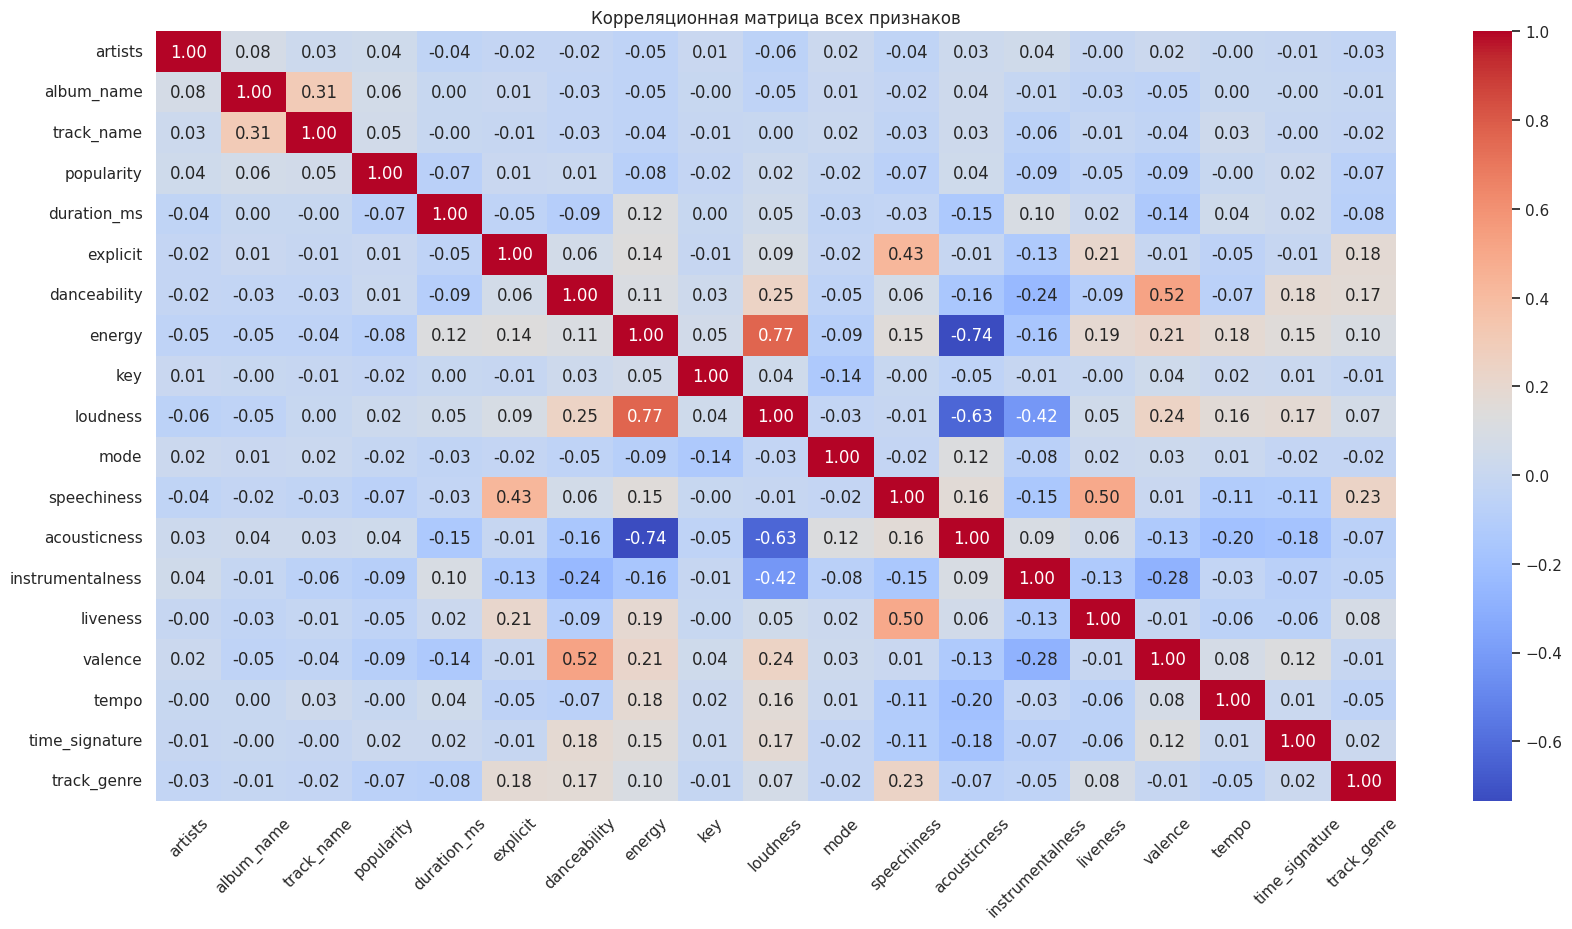

In [ ]:
plt.figure(figsize=(20, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица всех признаков")
plt.xticks(rotation=45)
plt.show()

In [ ]:
import numpy as np
sns.set(style="whitegrid")

## Популярность треков

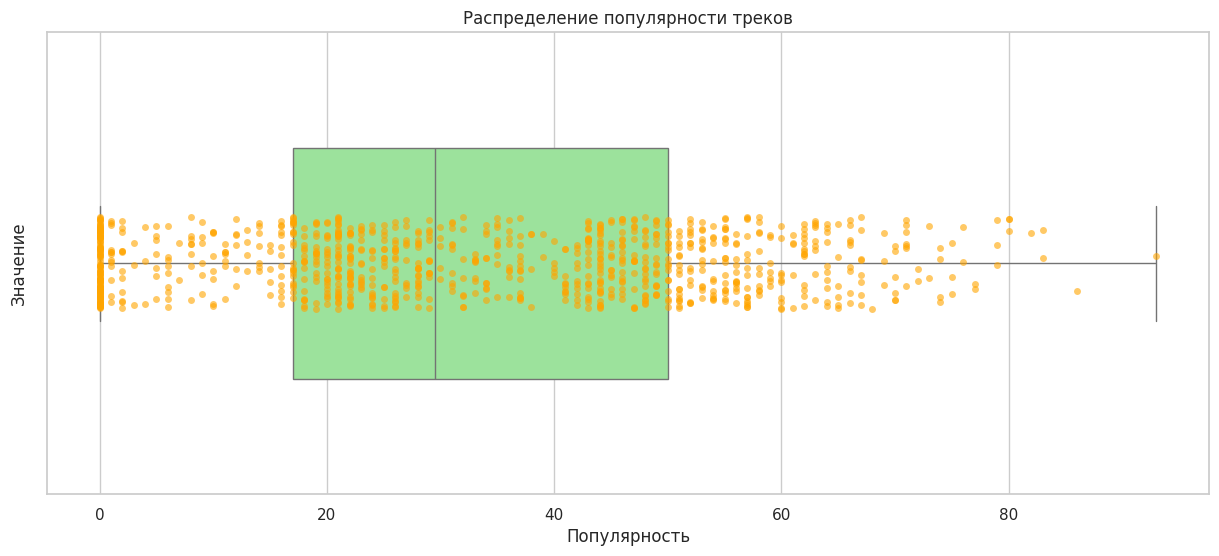

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ограничиваем подвыборку данных, если они слишком большие
sampled_data = data['popularity'].sample(1000, random_state=42) if len(data['popularity']) > 1000 else data['popularity']

plt.figure(figsize=(15, 6))
# Создаем коробчатую диаграмму
sns.boxplot(x=sampled_data, color='lightgreen', width=0.5)
# Используем stripplot для упрощения точечной диаграммы
sns.stripplot(x=sampled_data, color='orange', alpha=0.6, jitter=True)

plt.title('Распределение популярности треков')
plt.xlabel('Популярность')
plt.ylabel('Значение')

plt.show()


Большая часть данных о популярности треков сосредоточена в пределах межквартильного размаха (около 20–50). Это отражает основную тенденцию популярности.
Среднее значение популярности располагается ближе к центру прямоугольника (медиане), что говорит о более-менее симметричном распределении внутри диапазона.

## Процентное соотношение треков с ненормативной лексикой и без неё


<ipython-input-145-9b56f9fdc02b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


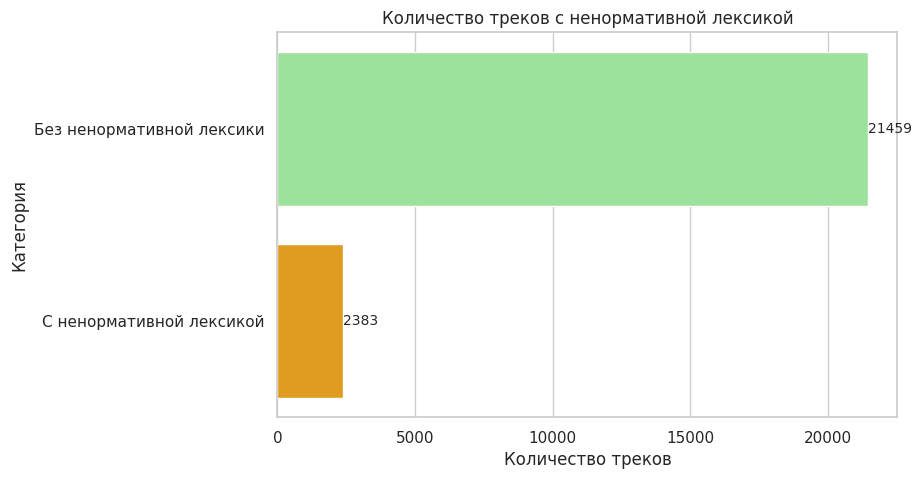

In [ ]:
plt.figure(figsize=(8, 5))
explicit_counts = data['explicit'].value_counts()
sns.barplot(
    x=explicit_counts.values,
    y=['Без ненормативной лексики', 'С ненормативной лексикой'],
    palette=['lightgreen', 'orange']
)

plt.title('Количество треков с ненормативной лексикой')
plt.xlabel('Количество треков')
plt.ylabel('Категория')
for index, value in enumerate(explicit_counts.values):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=10)

plt.show()


На графике видно, что треки без ненормативной лексики значительно преобладают.
Доля треков с ненормативной лексикой составляет меньшую часть выборки.

## Влияние наличия ненормативной лексики в треке на его среднюю популярность

<ipython-input-146-5681c4cdb5f2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


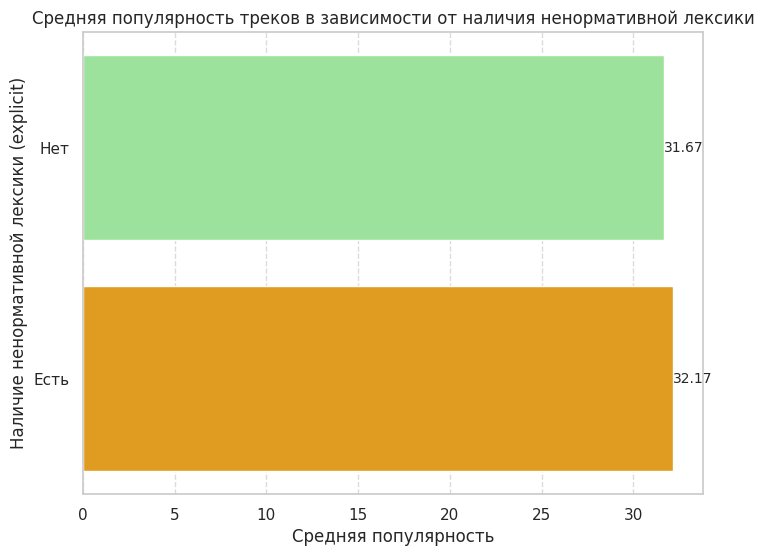

In [ ]:
plt.figure(figsize=(8, 6))
explicit_popularity = data_initial.groupby('explicit')['popularity'].mean().reset_index()
# Используем более простую палитру с заданными цветами
sns.barplot(
    data=explicit_popularity,
    y='explicit',
    x='popularity',
    palette=['lightgreen', 'orange'],
    orient='h'
)

plt.title('Средняя популярность треков в зависимости от наличия ненормативной лексики')
plt.xlabel('Средняя популярность')
plt.ylabel('Наличие ненормативной лексики (explicit)')
plt.yticks([0, 1], labels=['Нет', 'Есть'])

# Добавляем подписи значений
for index, value in enumerate(explicit_popularity['popularity']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Средняя популярность треков с ненормативной лексикой выше по сравнению с треками без ненормативной лексикой.
Это может отражать разницу в восприятии аудиторией треков с разным содержанием.

## Распределение треков по длительности в минутах

In [ ]:
duration_min = data['duration_ms'] / 60000
max_duration = duration_min.max()
bins = [0, 2, 3, 5, 7, 9, 12, max_duration]

duration_min.head(),  f'Максимальная: {max_duration}'

(0    3.844433
 1    2.493500
 2    3.513767
 3    3.365550
 4    3.314217
 Name: duration_ms, dtype: float64,
 'Максимальная: 79.8171')

In [ ]:
duration_counts = duration_min.value_counts(bins=bins, sort=False)
duration_counts


(-0.001, 2.0]      1788
(2.0, 3.0]         5240
(3.0, 5.0]        12919
(5.0, 7.0]         2798
(7.0, 9.0]          754
(9.0, 12.0]         231
(12.0, 79.817]      112
Name: count, dtype: int64

In [ ]:
labels = ['<2 мин', '2-3 мин', '3-5 мин', '5-7 мин', '7-9 мин', '9-12 мин', '12+ мин']

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(x=labels, height=duration_counts.values, color='palegreen')
plt.title('Количество треков по длительности')
plt.xlabel('Длительность (мин)')
plt.ylabel('Количество треков')
plt.show()

График наглядно показывает, сколько треков попадает в различные временные категории.
Можно заметить, что наиболее популярными являются треки средней длительности, что является стандартным для большинства музыкальных жанров.

## Жанры на популярность

<ipython-input-151-5fd590c3554d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=selected_genres, x='track_genre', y='popularity', palette='viridis')


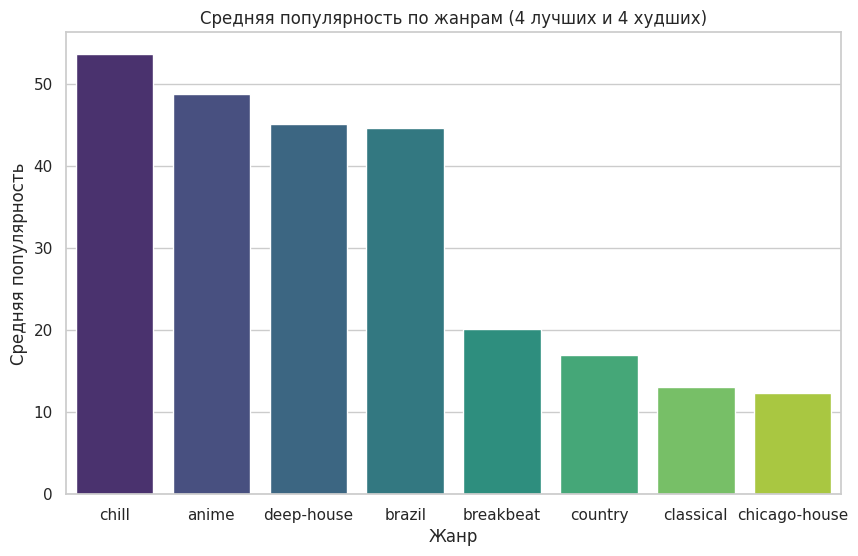

In [ ]:
genre_popularity = data_initial.groupby('track_genre')['popularity'].mean().reset_index()

# Сортируем по средней популярности (от популярного к непопулярному)
genre_popularity = genre_popularity.sort_values(by='popularity', ascending=False)

top_genres = genre_popularity.head(4)
bottom_genres = genre_popularity.tail(4)

selected_genres = pd.concat([top_genres, bottom_genres])
plt.figure(figsize=(10, 6))
sns.barplot(data=selected_genres, x='track_genre', y='popularity', palette='viridis')

plt.title('Средняя популярность по жанрам (4 лучших и 4 худших)')
plt.xlabel('Жанр')
plt.ylabel('Средняя популярность')
# plt.xticks(rotation=45)  # Поворот меток на оси X для удобства
plt.show()

Популярные жанры:

На графике видно, какие жанры являются наиболее популярными, основываясь на их средней популярности. Это позволяет выявить тенденции в музыкальной индустрии или в предпочтениях слушателей.

График ясно иллюстрирует контраст между популярными и непопулярными жанрами, что позволяет делать выводы о предпочтениях аудитории или особенностях музыкальных трендов.

# Выбросы


In [ ]:
def draw_boxplot_and_distribution(feature_name, feature_data):
  plt.figure(figsize=(14, 14))

  plt.subplot(3, 1, 1)
  sns.boxplot(x=feature_data)
  plt.title(f"Boxplot для признака {feature_name}")

  if feature_name != 'popularity':
    plt.subplot(3, 1, 2)
    plt.scatter(feature_data, data['popularity'], alpha=0.5)
    plt.title(f"Scatter Plot of {feature_name} vs Popularity")
    plt.xlabel(feature_name)
    plt.ylabel("Popularity")

  plt.tight_layout()
  plt.show()

  lower_quantile = feature_data.quantile(0.25)
  median = feature_data.quantile(0.5)
  upper_quantile = feature_data.quantile(0.75)

  print(f'Нижний квантиль (Q1): {round(lower_quantile, 2)}')
  print(f'Медиана (Q2): {round(median, 2)}')
  print(f'Верхний квантиль (Q3): {round(upper_quantile, 2)}')

## Графики для каждой метрики

### Длительность трека

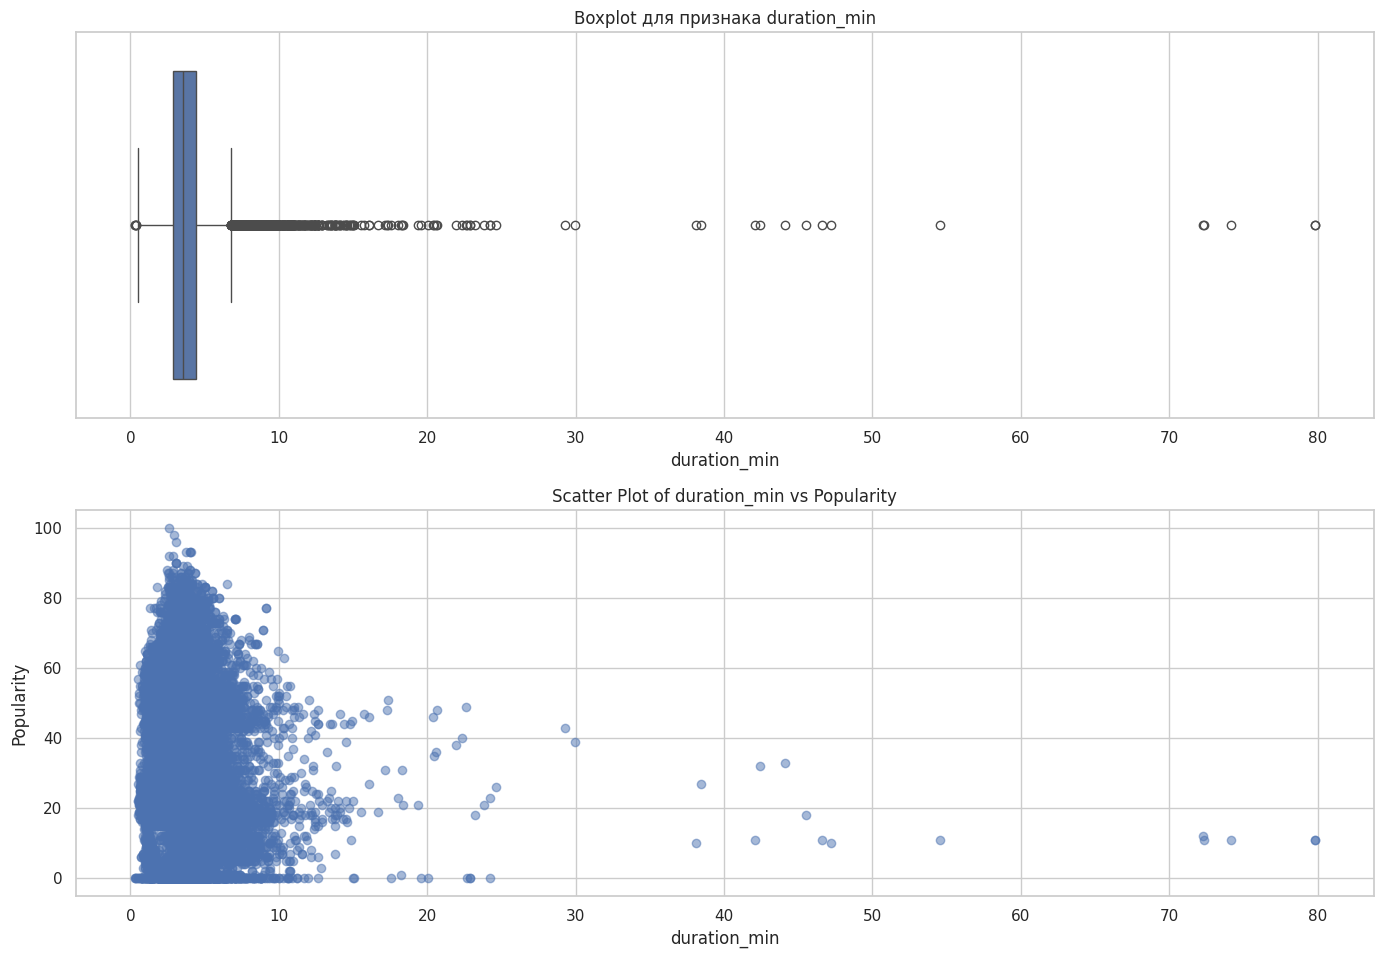

Нижний квантиль (Q1): 2.87
Медиана (Q2): 3.57
Верхний квантиль (Q3): 4.45


In [ ]:

data['duration_min'] = data['duration_ms'] / 60000
draw_boxplot_and_distribution('duration_min', data['duration_min'])

### Работа с танцевальностью треков

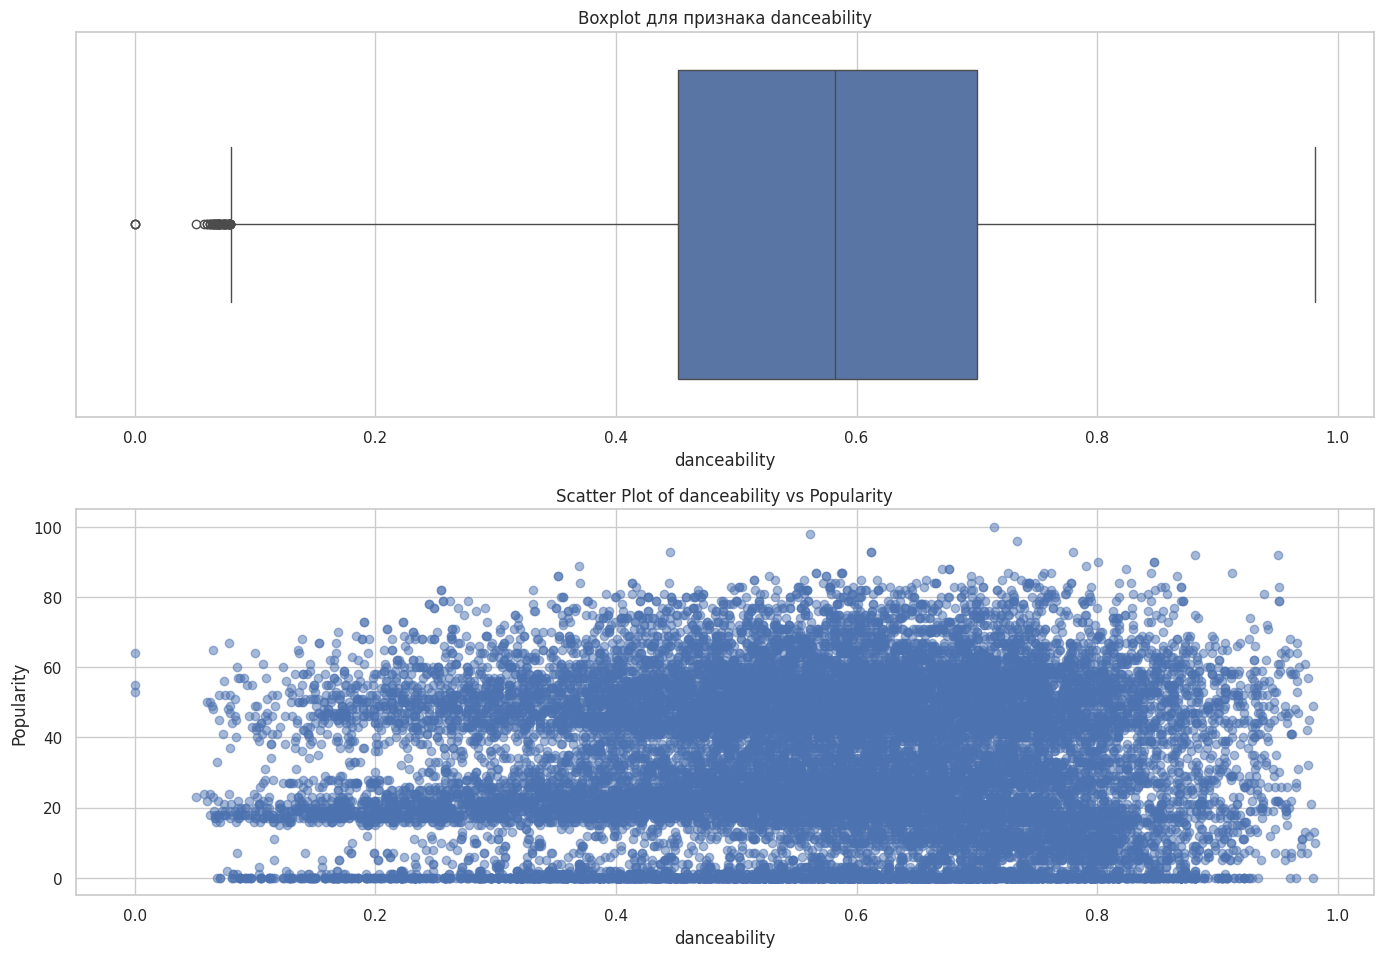

Нижний квантиль (Q1): 0.45
Медиана (Q2): 0.58
Верхний квантиль (Q3): 0.7


In [ ]:
draw_boxplot_and_distribution('danceability', data['danceability'])

### Работа с энергичностью треков

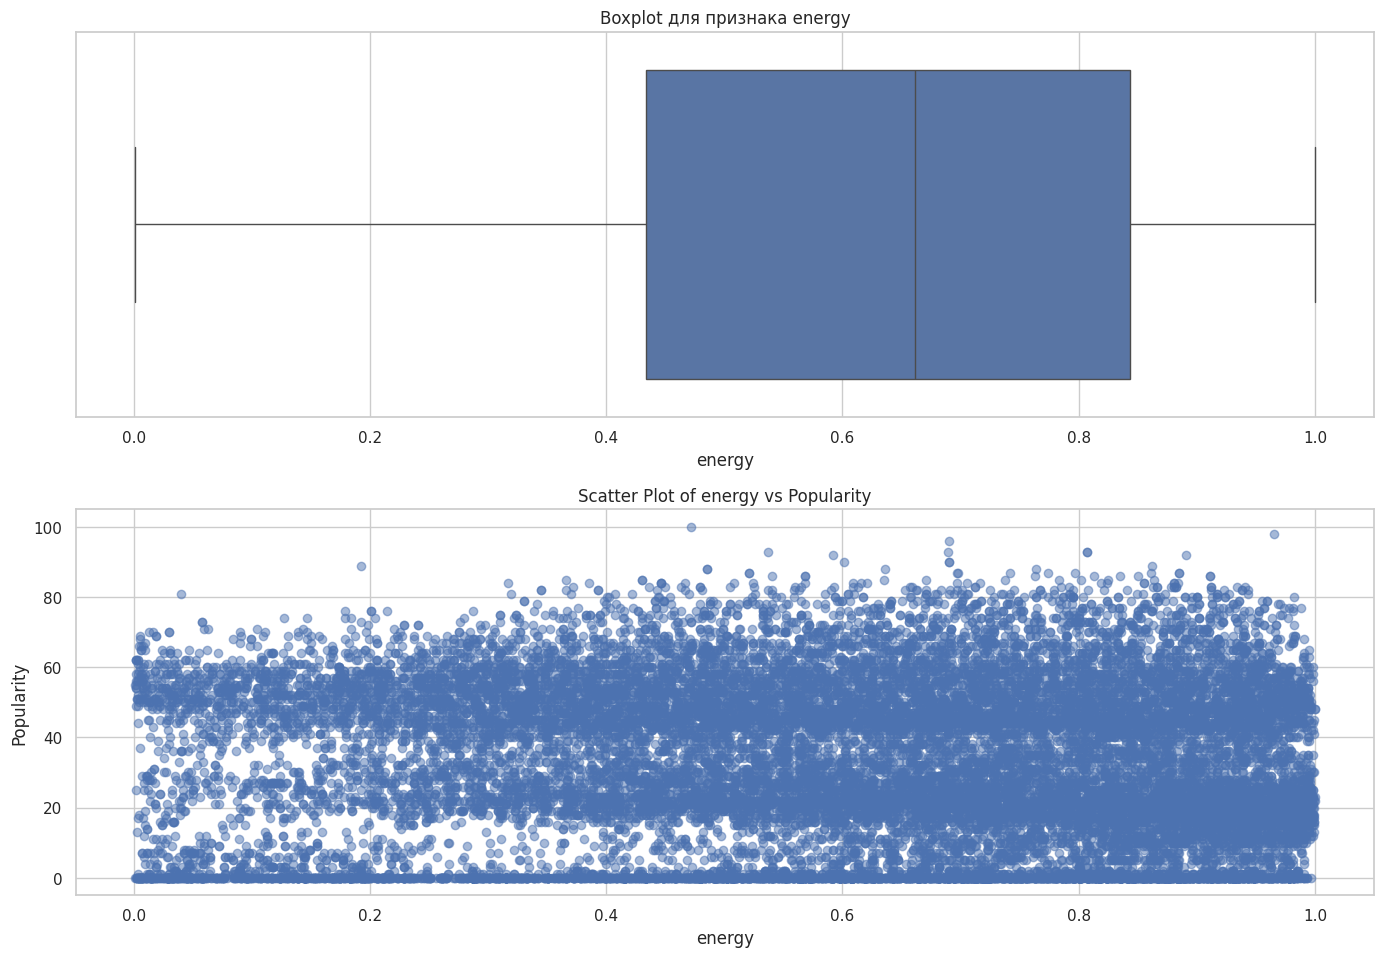

Нижний квантиль (Q1): 0.43
Медиана (Q2): 0.66
Верхний квантиль (Q3): 0.84


In [ ]:
draw_boxplot_and_distribution('energy', data['energy'])

### Работа с тональностью треков

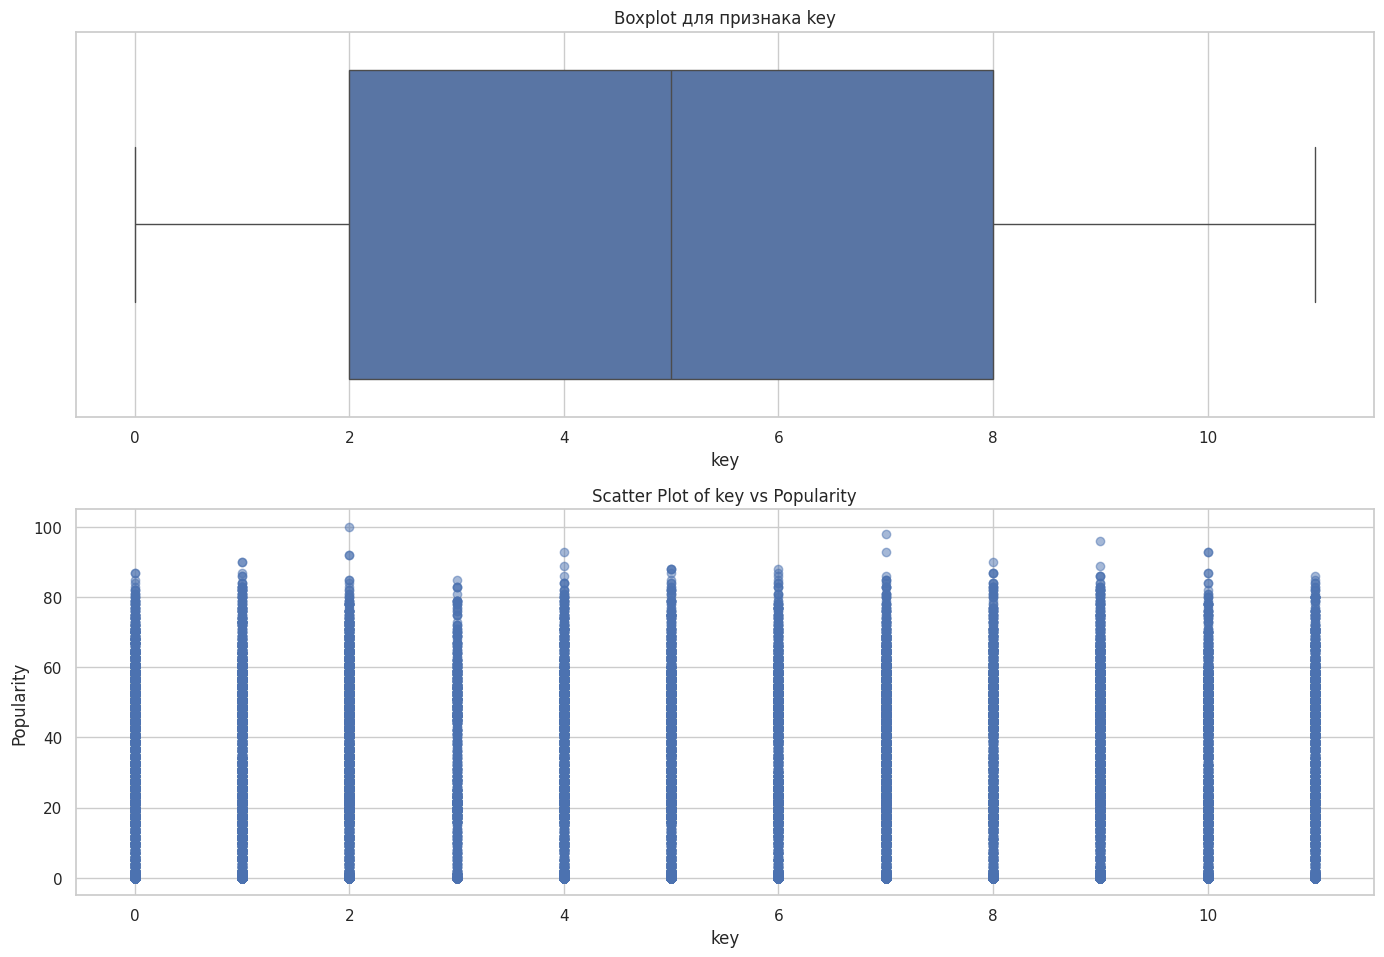

Нижний квантиль (Q1): 2.0
Медиана (Q2): 5.0
Верхний квантиль (Q3): 8.0


In [ ]:
draw_boxplot_and_distribution('key', data['key'])

### Работа со средней громкостью треков

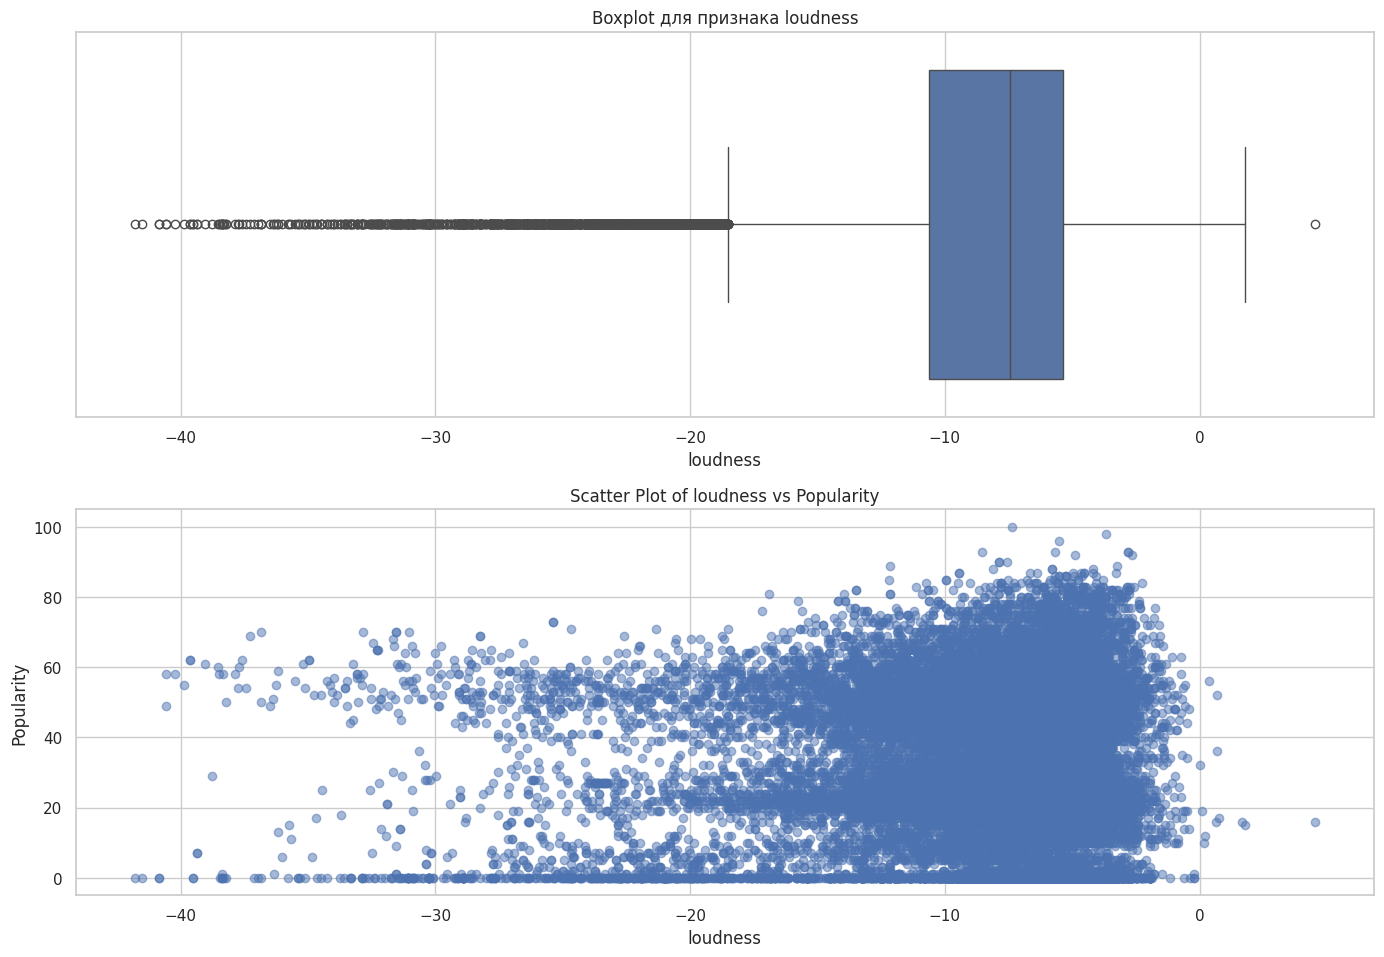

Нижний квантиль (Q1): -10.63
Медиана (Q2): -7.44
Верхний квантиль (Q3): -5.37


In [ ]:
draw_boxplot_and_distribution('loudness', data['loudness'])

### Работа с режимом тональности трека


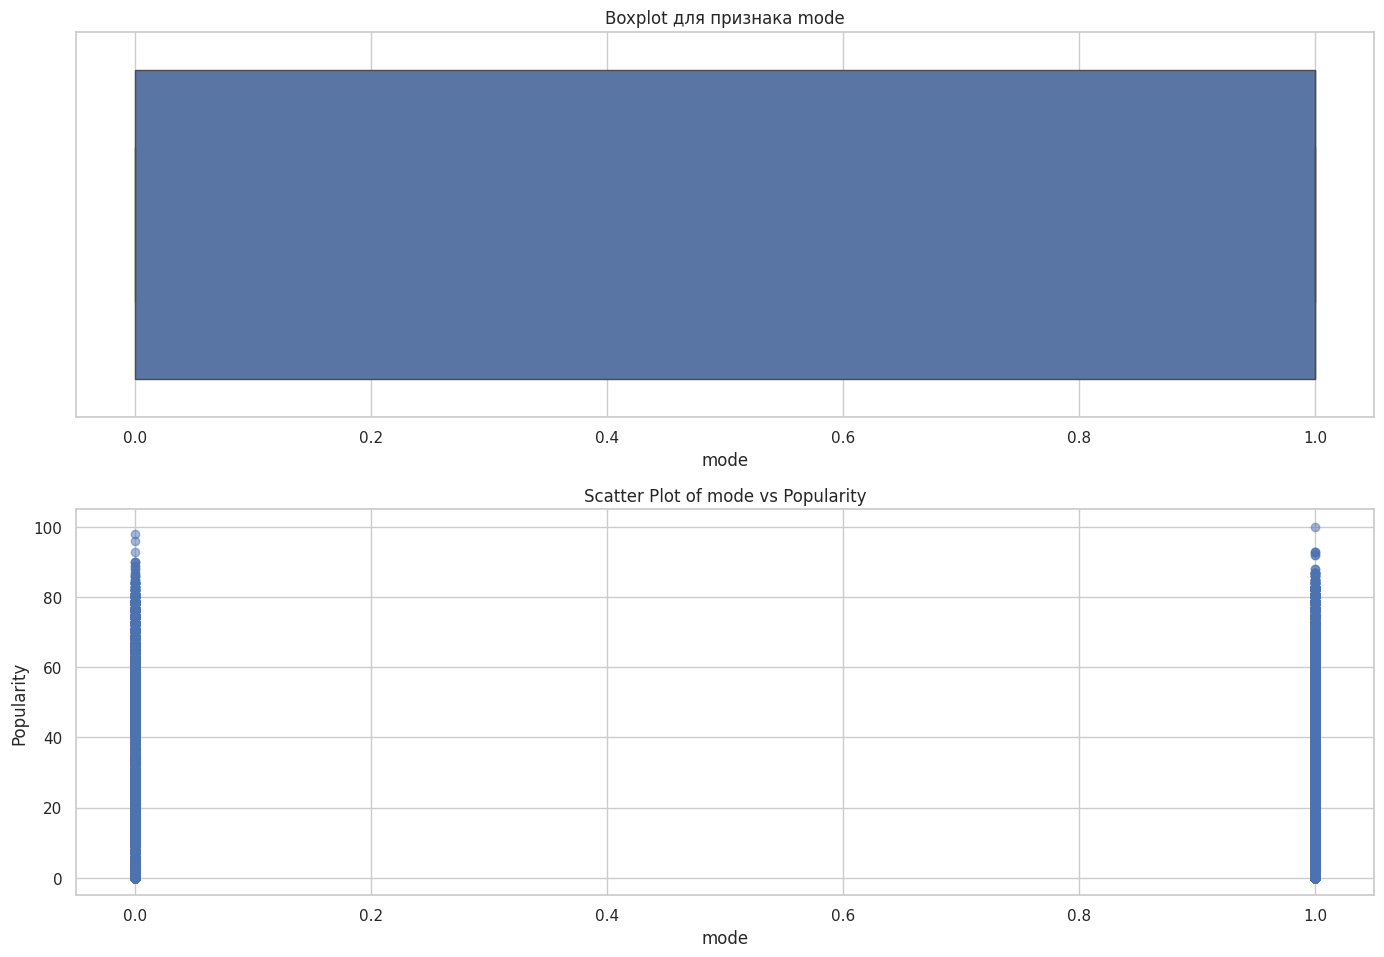

Нижний квантиль (Q1): 0.0
Медиана (Q2): 1.0
Верхний квантиль (Q3): 1.0


In [ ]:
draw_boxplot_and_distribution('mode', data['mode'])

### Работа с показателем речего контента в треке

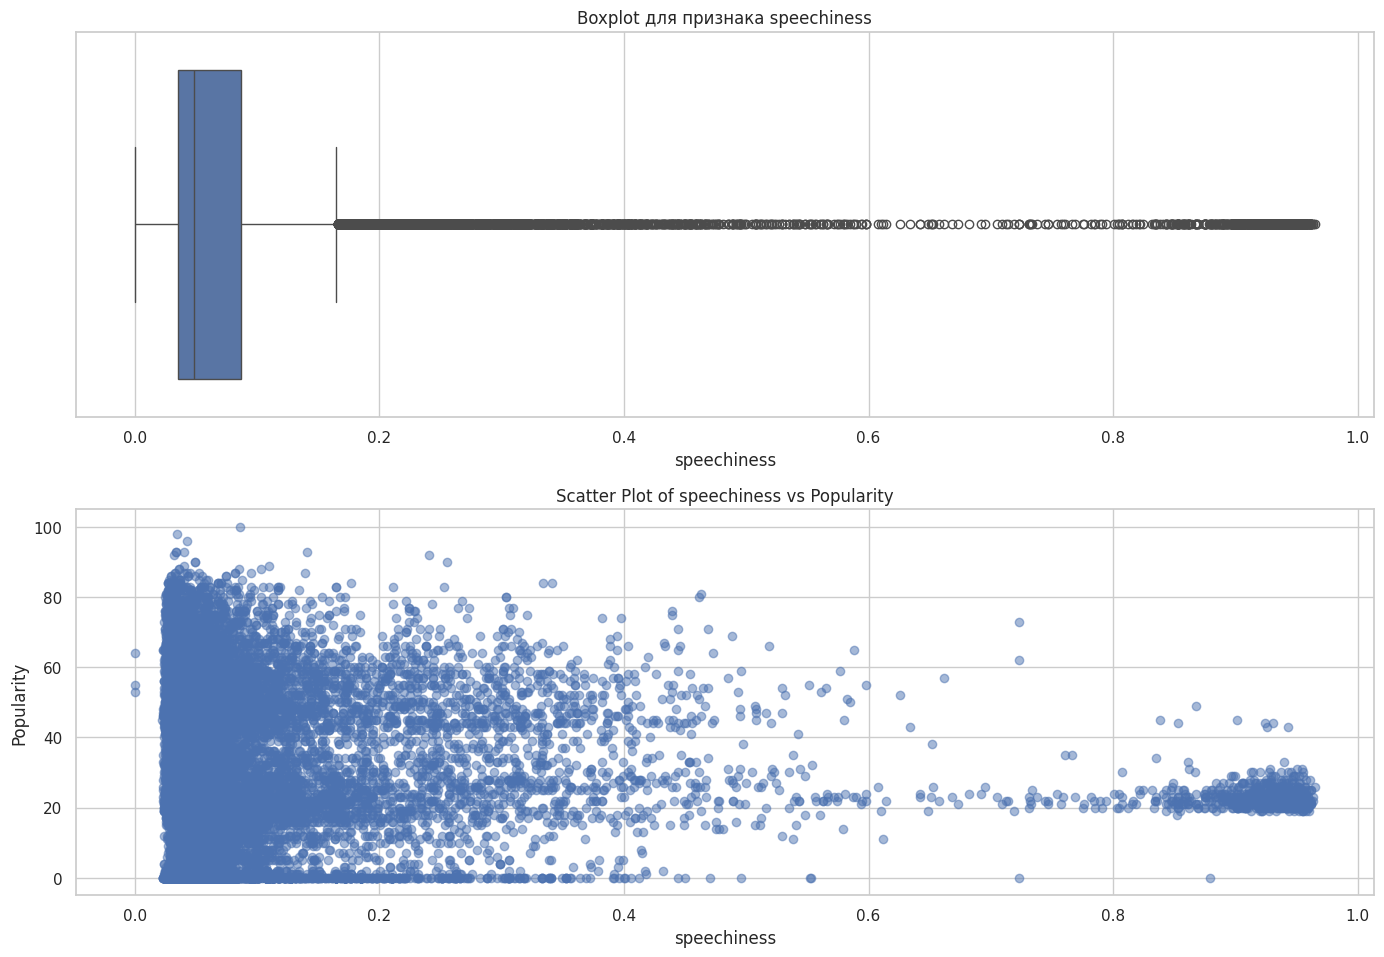

Нижний квантиль (Q1): 0.04
Медиана (Q2): 0.05
Верхний квантиль (Q3): 0.09


In [ ]:
draw_boxplot_and_distribution('speechiness', data['speechiness'])

### Работа с акустичностью трека

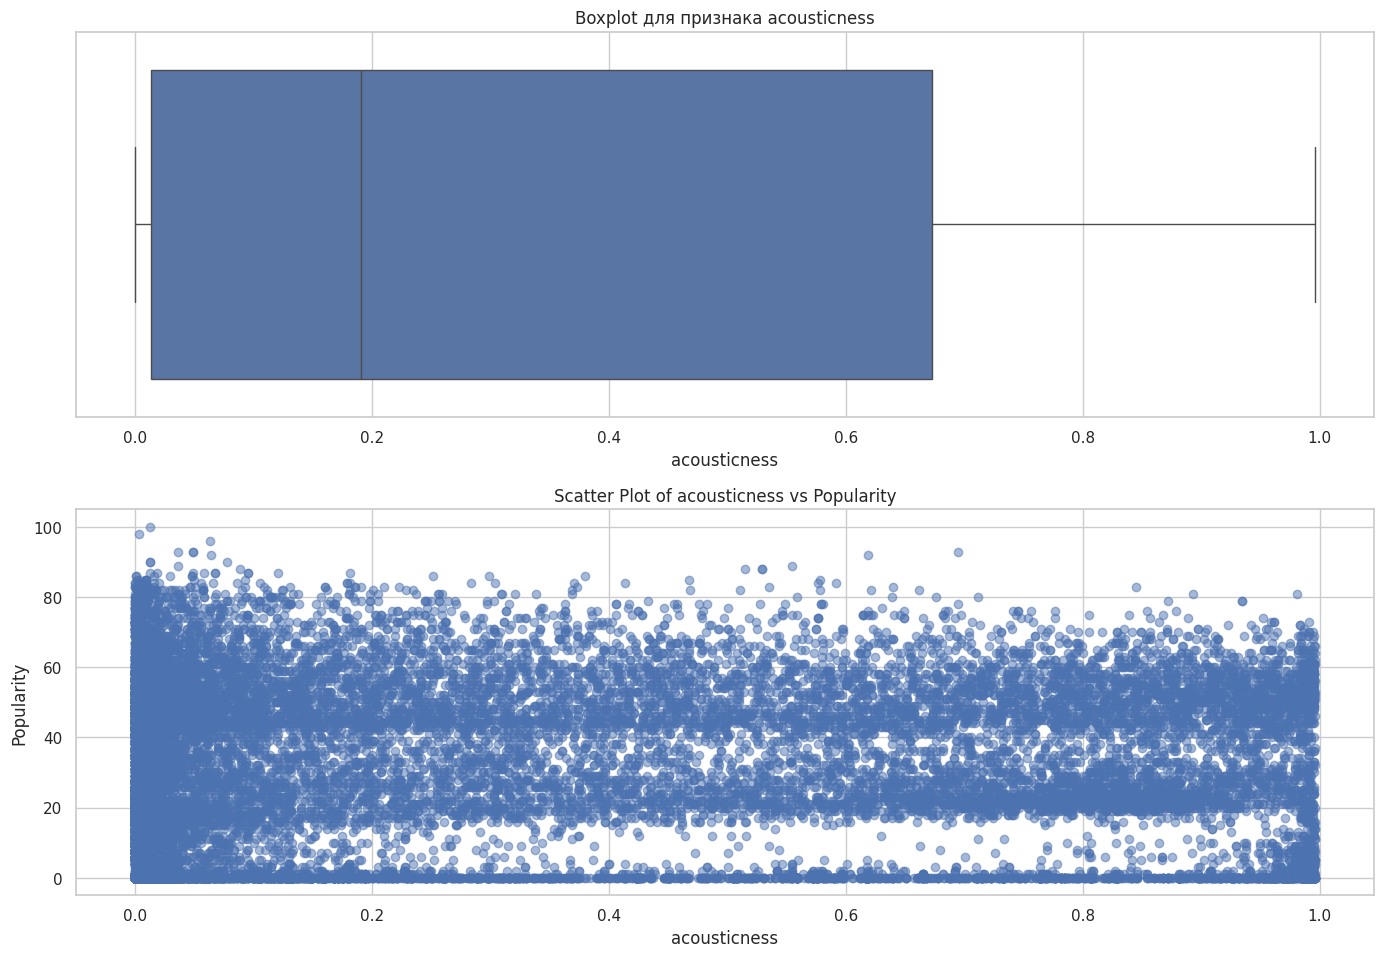

Нижний квантиль (Q1): 0.01
Медиана (Q2): 0.19
Верхний квантиль (Q3): 0.67


In [ ]:
draw_boxplot_and_distribution('acousticness', data['acousticness'])

### Работа с показателем инструментальности трека

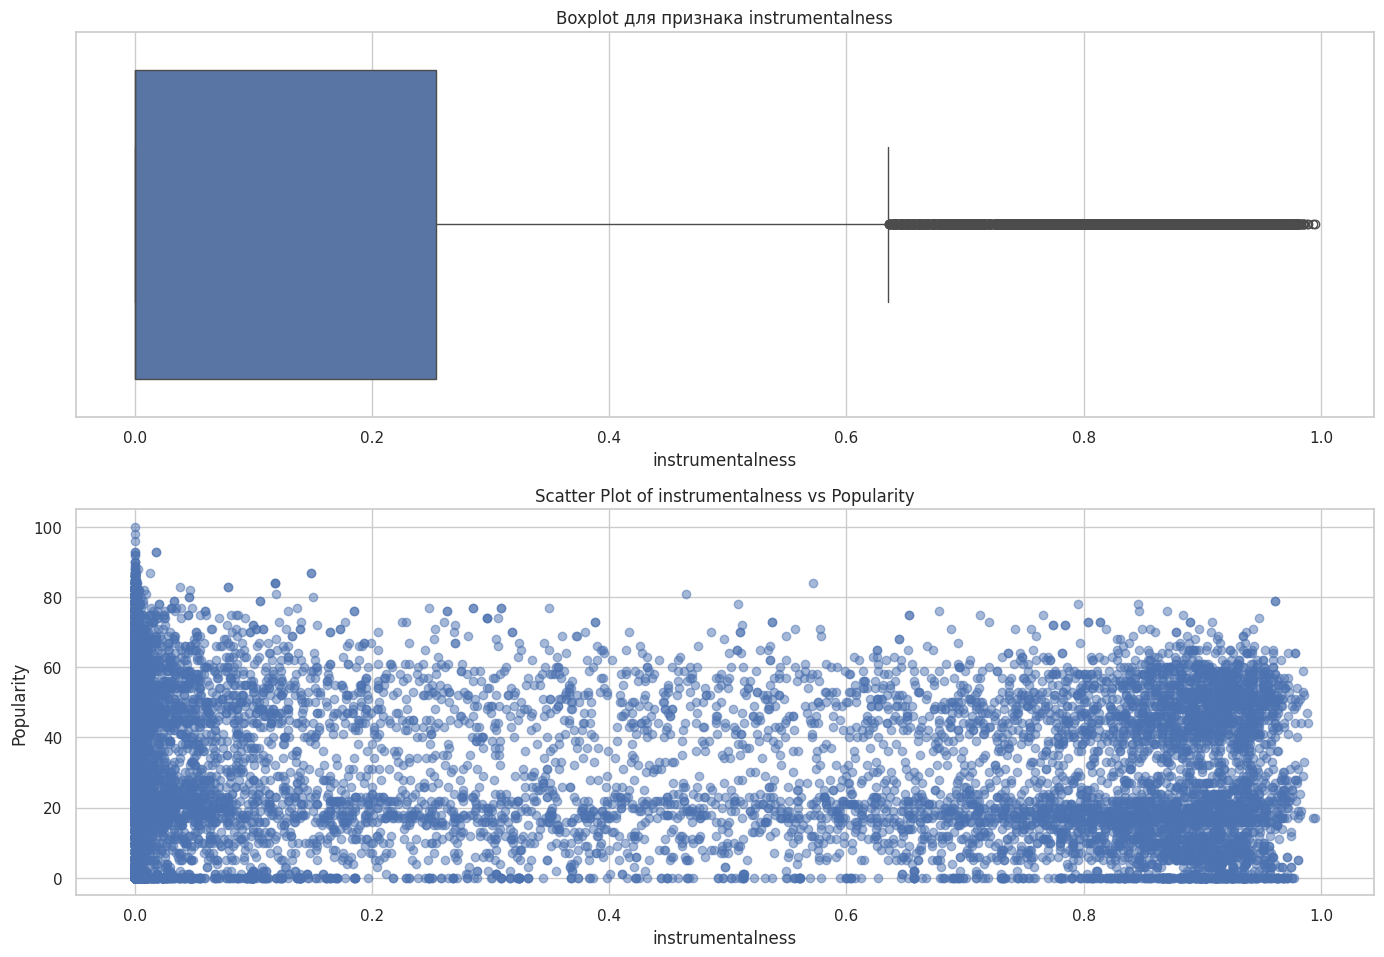

Нижний квантиль (Q1): 0.0
Медиана (Q2): 0.0
Верхний квантиль (Q3): 0.25


In [ ]:
draw_boxplot_and_distribution('instrumentalness', data['instrumentalness'])

### Работа с показателем "живости" трека

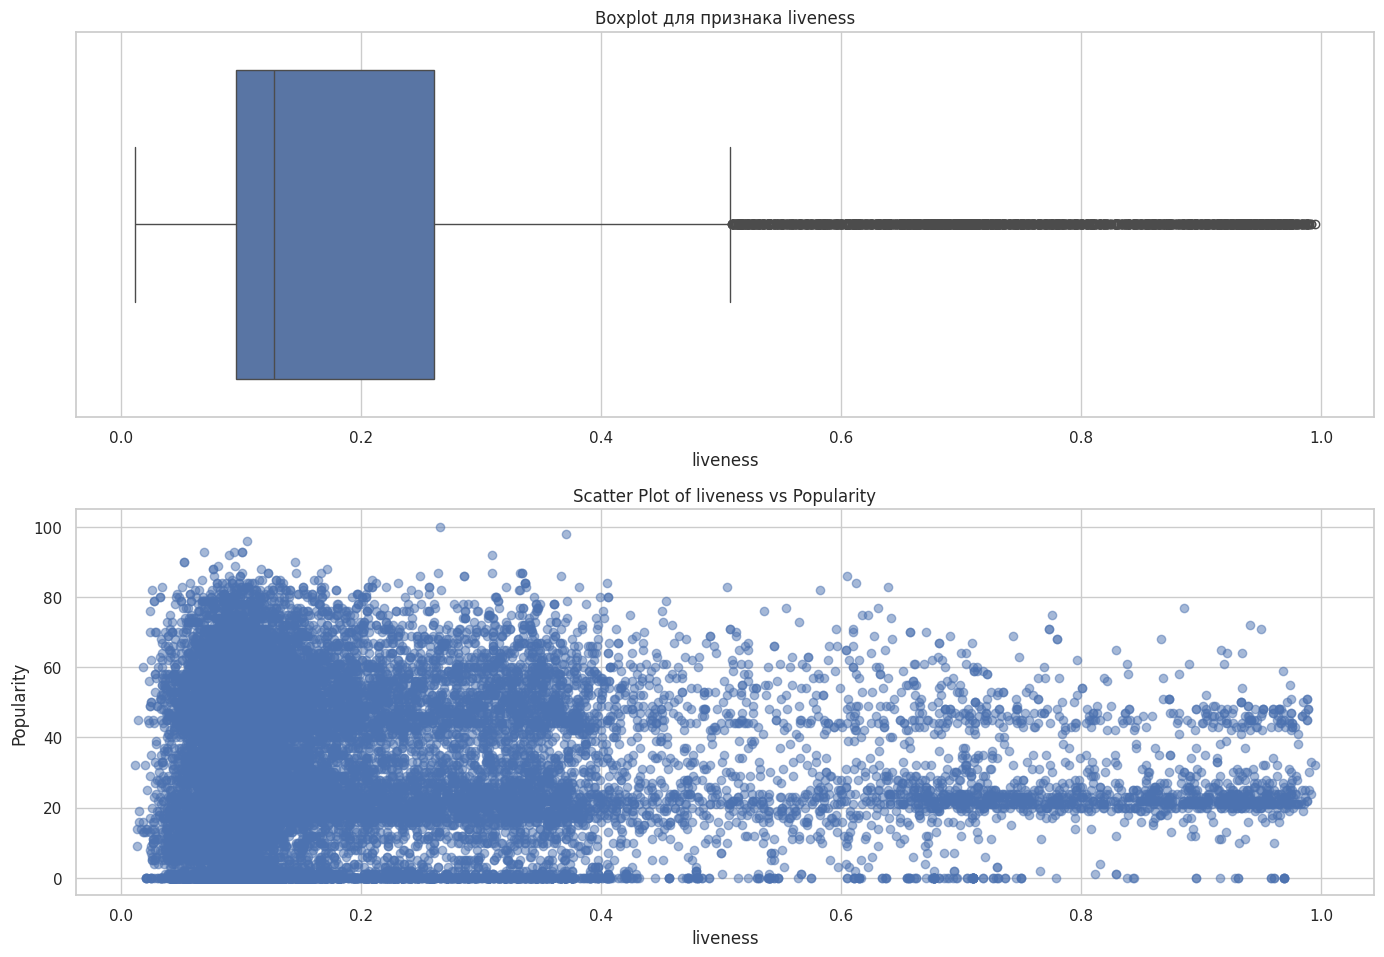

Нижний квантиль (Q1): 0.1
Медиана (Q2): 0.13
Верхний квантиль (Q3): 0.26


In [ ]:
draw_boxplot_and_distribution('liveness', data['liveness'])

###Работа с настроением трека

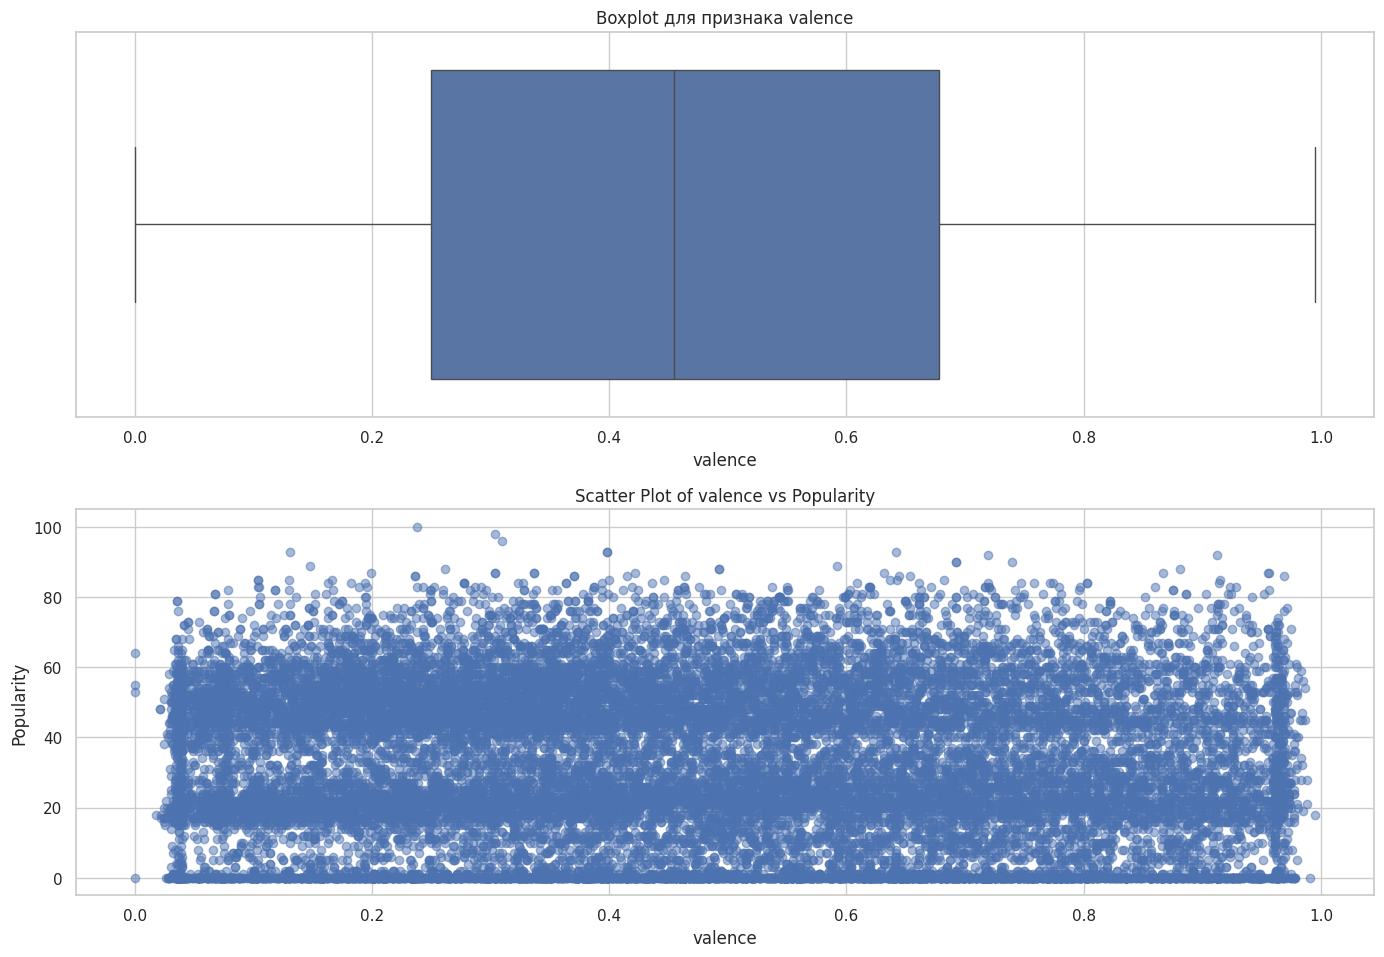

Нижний квантиль (Q1): 0.25
Медиана (Q2): 0.46
Верхний квантиль (Q3): 0.68


In [ ]:
draw_boxplot_and_distribution('valence', data['valence'])

###Работа с темпом трека

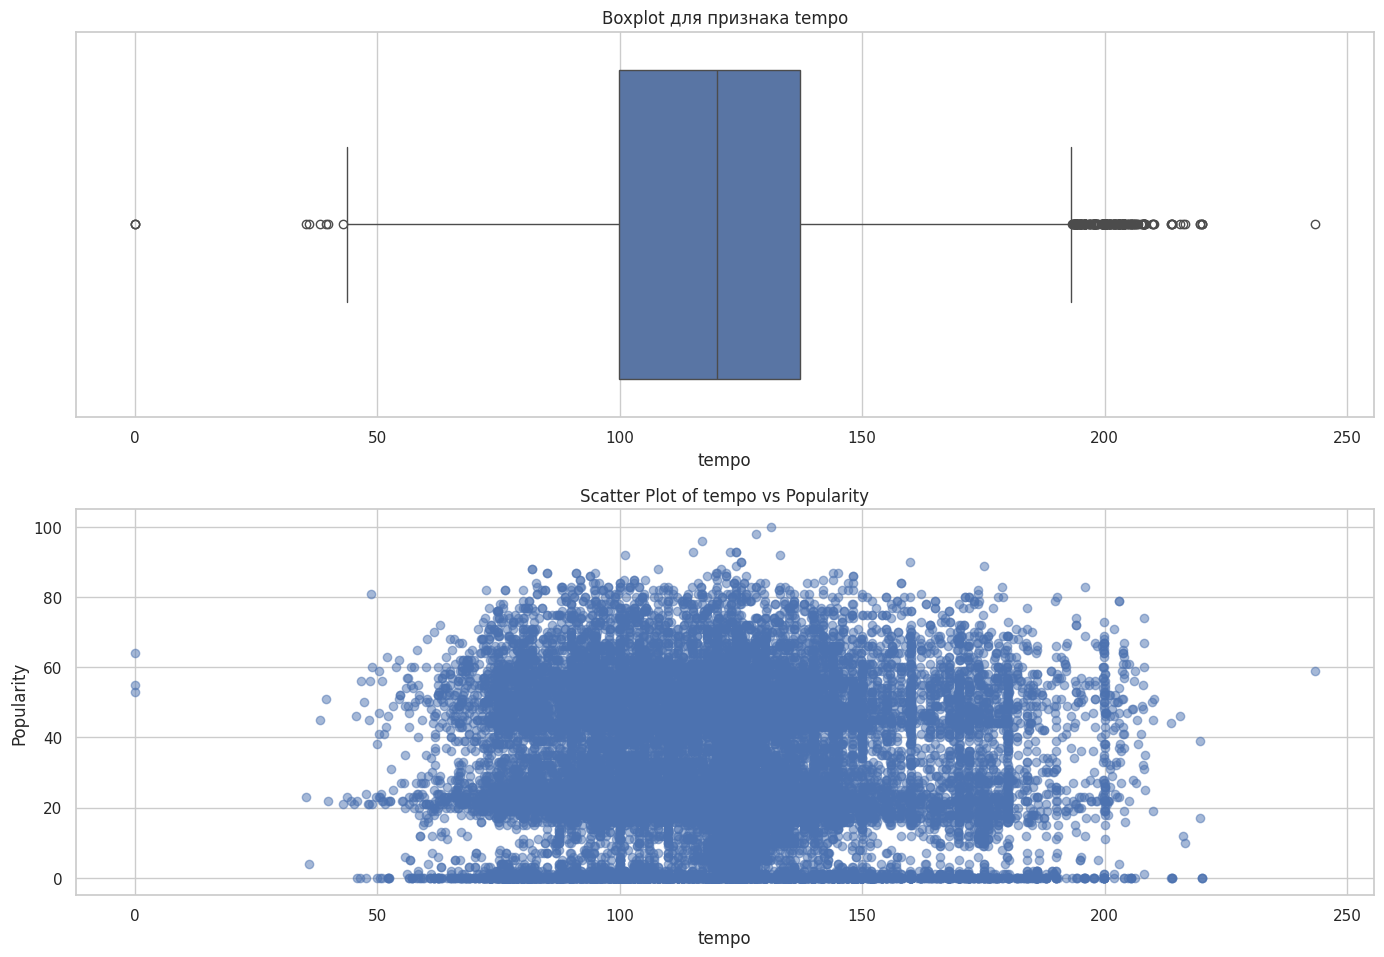

Нижний квантиль (Q1): 99.8
Медиана (Q2): 120.04
Верхний квантиль (Q3): 137.12


In [ ]:
draw_boxplot_and_distribution('tempo', data['tempo'])

###Работа с размерностью трека


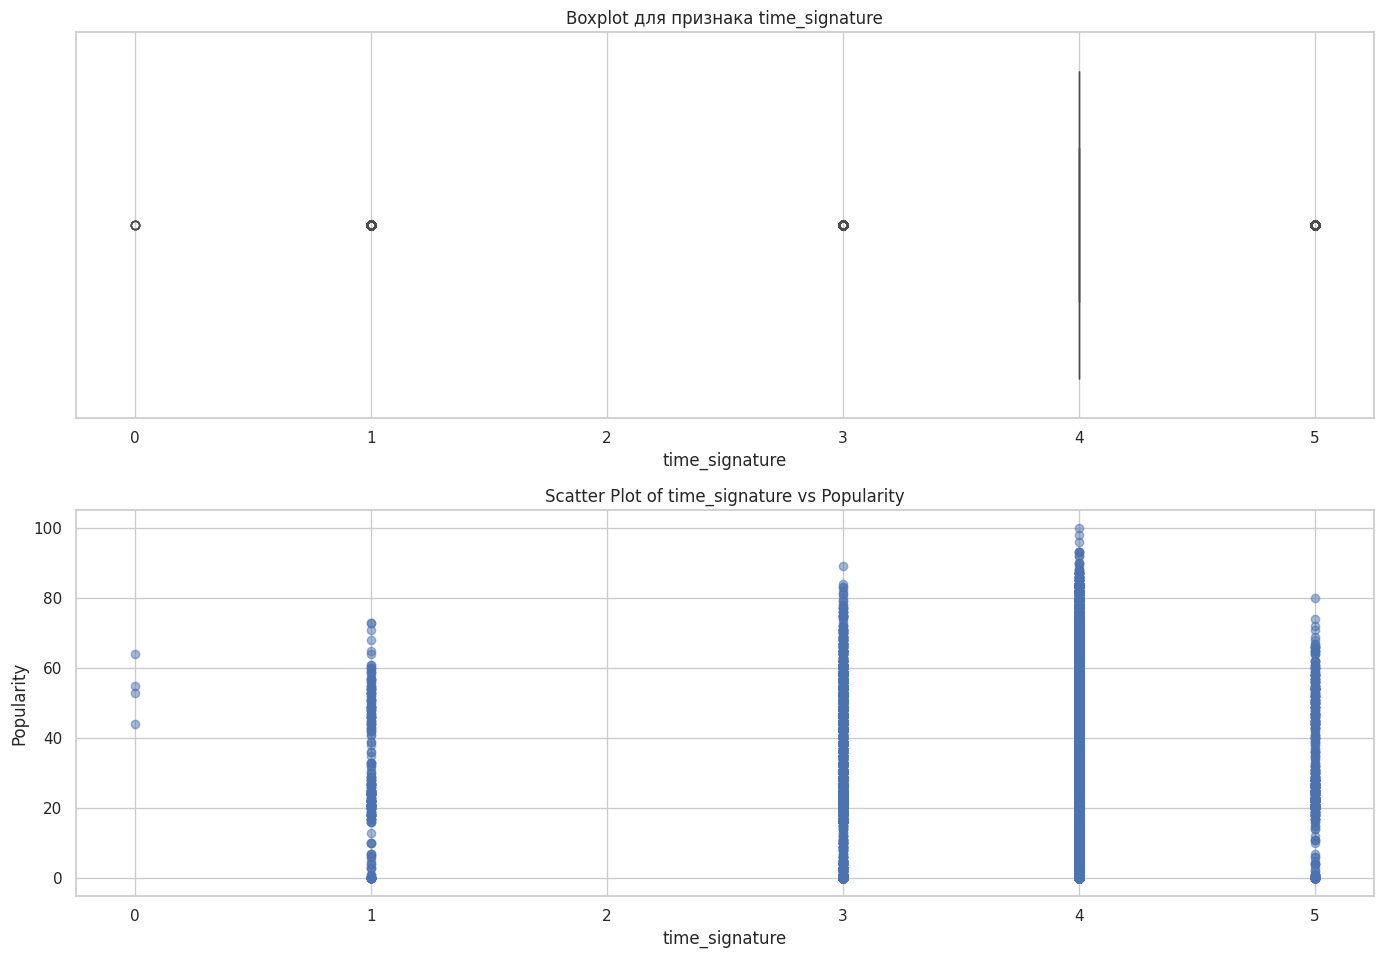

Нижний квантиль (Q1): 4.0
Медиана (Q2): 4.0
Верхний квантиль (Q3): 4.0


In [ ]:
draw_boxplot_and_distribution('time_signature', data['time_signature'])

## Работа с выбросами


Удаление выбросов, в моём случае, только ухудшало метрики. Поэтому решил не удалять выбросы.

### Создание новых признаков

In [ ]:
import math
duration_min = data['duration_ms'] / 60000
max_duration = duration_min.max()

bins = [0, 1, 2, 3, 4, 5, 10, max_duration]
labels = ['0-1 min', '1-2 min', '2-3 min', '3-4 min', '4-5 min', '5-10 min', '10+ min']

duration_category = pd.cut(duration_min, bins=bins, labels=labels, include_lowest=True)
duration_dummies = pd.get_dummies(duration_category, prefix='duration')

data = pd.concat([data, duration_dummies], axis=1)
data = data.drop('duration_ms', axis=1)

In [ ]:
data.iloc[0]

artists                  2696
album_name               2089
track_name               3079
popularity               73.0
explicit                    0
danceability            0.676
energy                  0.461
key                       1.0
loudness               -6.746
mode                      0.0
speechiness             0.143
acousticness           0.0322
instrumentalness     0.000001
liveness                0.358
valence                 0.715
tempo                  87.917
time_signature            4.0
track_genre                 0
duration_min         3.844433
duration_0-1 min        False
duration_1-2 min        False
duration_2-3 min        False
duration_3-4 min         True
duration_4-5 min        False
duration_5-10 min       False
duration_10+ min        False
Name: 0, dtype: object

Создание признака "Настроение-танцевальность"

In [ ]:
data['valence_dancebility'] = data['valence'] * data['danceability']

### Преобразование bool признаков в числовые

In [ ]:
data.info()
boolean_features = data.select_dtypes(include=['bool']).columns.tolist()
boolean_features

<class 'pandas.core.frame.DataFrame'>
Index: 23842 entries, 0 to 23841
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   artists              23842 non-null  int64  
 1   album_name           23842 non-null  int64  
 2   track_name           23842 non-null  int64  
 3   popularity           23842 non-null  float64
 4   explicit             23842 non-null  int64  
 5   danceability         23842 non-null  float64
 6   energy               23842 non-null  float64
 7   key                  23842 non-null  float64
 8   loudness             23842 non-null  float64
 9   mode                 23842 non-null  float64
 10  speechiness          23842 non-null  float64
 11  acousticness         23842 non-null  float64
 12  instrumentalness     23842 non-null  float64
 13  liveness             23842 non-null  float64
 14  valence              23842 non-null  float64
 15  tempo                23842 non-null  floa

['duration_0-1 min',
 'duration_1-2 min',
 'duration_2-3 min',
 'duration_3-4 min',
 'duration_4-5 min',
 'duration_5-10 min',
 'duration_10+ min']

In [ ]:
boolean_cols = data.select_dtypes(include=['bool']).columns
for col in boolean_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

## Корреляция новых признаков с популярностью

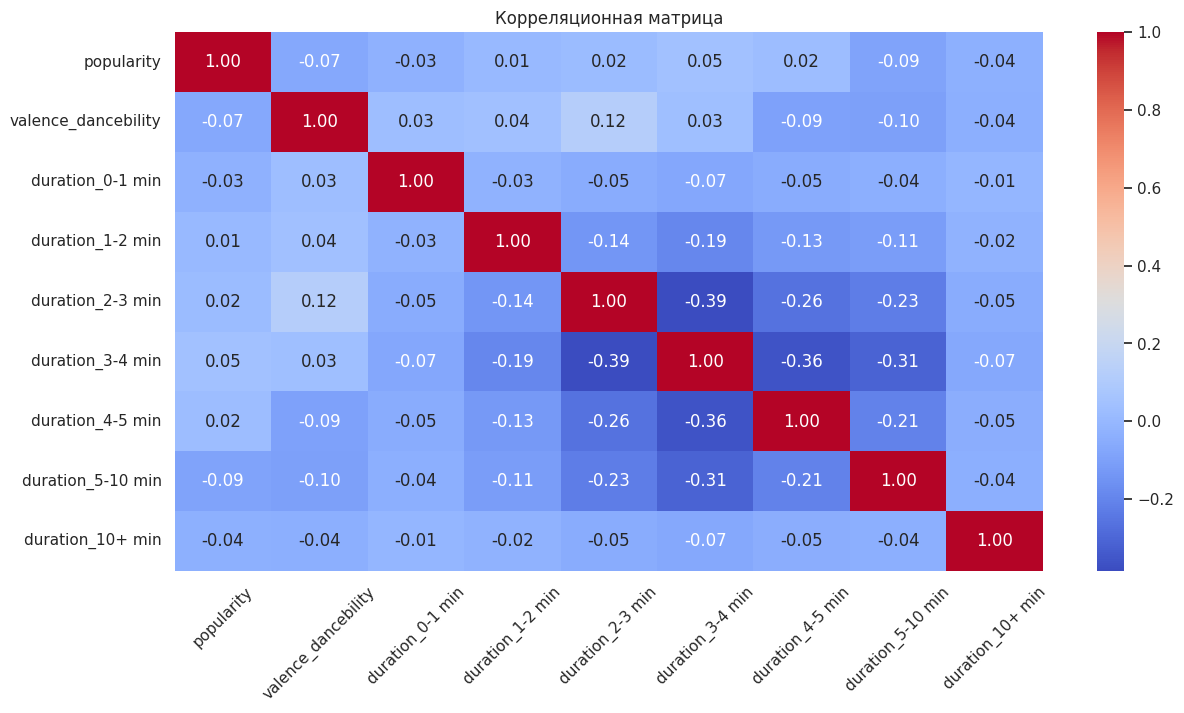

In [ ]:
features = ['popularity', 'valence_dancebility', 'duration_0-1 min', 'duration_1-2 min',
            'duration_2-3 min', 'duration_3-4 min', 'duration_4-5 min', 'duration_5-10 min',
            'duration_10+ min']

corr_matrix = data[features].corr()
plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица")
plt.xticks(rotation=45)
plt.show()

Очень плохо подобрал новые признаки тк на основе корреляционной матрицы можно сделать вывод, что ни один из новых признаков не коррелирует с популярностью

#Обучение

In [ ]:
X = data.drop(columns=['popularity', 'valence', 'time_signature',
                       'key', 'mode', 'liveness'])
y = data['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
data.isnull().sum()
data = data.dropna()
data.isnull().sum()

artists                0
album_name             0
track_name             0
popularity             0
explicit               0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature         0
track_genre            0
duration_min           0
duration_0-1 min       0
duration_1-2 min       0
duration_2-3 min       0
duration_3-4 min       0
duration_4-5 min       0
duration_5-10 min      0
duration_10+ min       0
valence_dancebility    0
dtype: int64

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import cross_validate
!pip install scikeras
from scikeras.wrappers import KerasRegressor
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def calculate_cross_validate(model):
    scoring = {
      'mse': 'neg_mean_squared_error',
      'r2': 'r2'
    }

    results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)

    return results

def print_cross_validate(results):
    mse = -results['test_mse']
    r2 = results['test_r2']

    print("Средний MSE:", round(mse.mean(), 2))
    print("Лучший MSE:", round(mse.min(), 2))
    print()
    print("Средний R^2:", round(r2.mean(), 2))
    print("Лучший R^2:", round(r2.max(), 2))

## Модель 1

In [ ]:
def create_model1():
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1)
    ])


    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = create_model1()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,681 (30.00 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 747.0499 - val_loss: 461.6107
Epoch 2/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 451.1950 - val_loss: 452.3111
Epoch 3/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 433.4884 - val_loss: 447.7262
Epoch 4/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 435.1285 - val_loss: 444.1493
Epoch 5/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 429.2375 - val_loss: 432.7502
Epoch 6/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 414.8717 - val_loss: 429.8346
Epoch 7/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 415.1021 - val_loss: 437.7461
Epoch 8/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 402.3358 - val_loss: 420.5347
Epoch 9/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 391.8042 - val_loss: 433.3095
Epoch 10/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 394.3857 - val_loss: 414.1649
Epoch 11/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 390.0725 - val_loss: 414.5882
Epoch 12

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 394.4649
Test Loss: 399.2892761230469


### Результаты

In [ ]:
y_test.value_counts()

popularity
0.0     661
22.0    139
21.0    124
20.0    121
44.0    119
       ... 
81.0      3
93.0      3
84.0      2
88.0      1
90.0      1
Name: count, Length: 91, dtype: int64

In [ ]:
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')
print(f'MAPE: {mape:.2f}%')

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 15.29
MSE: 399.29
RMSE: 19.98
R2: 0.20
MAPE: 12689993916894568.00%



1. **MAE (Mean Absolute Error) — Средняя абсолютная ошибка**
  * Это среднее значение абсолютных разностей между предсказанными и фактическими значениями. MAE показывает, насколько в среднем предсказания модели отличаются от реальных значений.
  * Чем меньше значение MAE, тем лучше модель. Если MAE = 0, то модель предсказывает точно.
2. **MSE (Mean Squared Error) — Среднеквадратичная ошибка**
  * Это среднее значение квадратов разностей между предсказанными и фактическими значениями. MSE усиливает влияние больших ошибок, поскольку они возводятся в квадрат.
  * Меньшее значение MSE указывает на лучшую модель. MSE = 0 означает, что модель идеально предсказывает данные. Эта метрика часто используется в задачах оптимизации модели.
3. **RMSE (Root Mean Squared Error) — Корень среднеквадратичной ошибки**
  * Это квадратный корень из MSE, который возвращает ошибку обратно в единицы измерения исходных данных.
  * RMSE помогает понять средний уровень ошибки в тех же единицах, что и исходные данные. Чем меньше RMSE, тем лучше модель. Оптимально, если RMSE близко к 0.
4. **R² (Коэффициент детерминации)**
  * Эта метрика показывает, какая доля дисперсии зависимой переменной объясняется моделью. Значения R² варьируются от 0 до 1:
    * R² = 1: Модель идеально объясняет все изменения зависимой переменной.
    * R² = 0: Модель не объясняет вообще никакой дисперсии зависимой переменной, предсказывает только среднее значение.
    * R² < 0: Это возможно, если модель даёт худшие предсказания, чем простая модель с постоянным средним значением.
5. **MAPE (Mean Absolute Percentage Error) — Средняя абсолютная процентная ошибка**
  * Она измеряет среднюю процентную ошибку предсказаний модели относительно фактических значений.
  * Чем меньше значение MAPE, тем точнее модель. Значение MAPE = 0% означает идеальную точность. Однако, в случае высоких значений или при работе с нулями в данных, MAPE может быть неустойчивым и вызывать аномальные результаты (как в вашем случае).

  Использование MAPE бесполезно, так как значительное количество значений в y_test - это 0. Поэтому значение MAPE аномально высокое

MSE = квадрат
MAE = модуль
RMSE = MSE с корнем


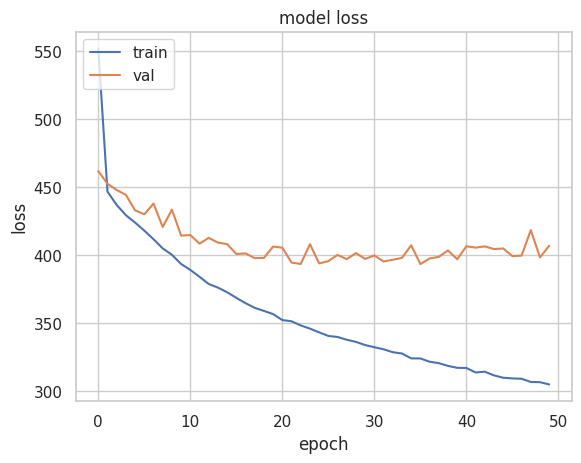

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

На графике видно, что модель начинает переобучаться, так как train_loss уменьшается стремительнее, чем val_loss

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
150/150 ━━━━━━━━

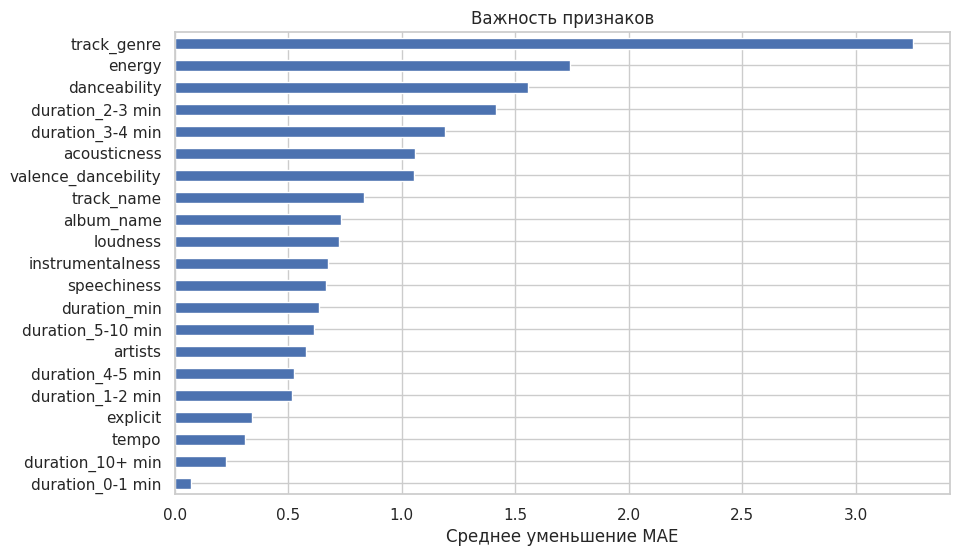

In [ ]:
# Важность признаков с помощью permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

Одни из самых важных признаков - жанр трека, его энергичность и танцевальность.


### Кросс валидация

In [ ]:
model_wrapper1 = KerasRegressor(model=create_model1, epochs=50, batch_size=32, verbose=0)

In [ ]:
cross_val_model1 = calculate_cross_validate(model_wrapper1)
print_cross_validate(cross_val_model1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Средний MSE: 387.18
Лучший MSE: 374.42

Средний R^2: 0.22
Лучший R^2: 0.24


## Модель 2


In [ ]:
# Build the model
def create_model2():
    model2 = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1)
    ])

    # Compile the model
    model2.compile(optimizer='adam', loss='mean_squared_error')

    return model2

model2 = create_model2()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 128)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,697 (53.50 KB)

 Trainable params: 13,697 (53.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history2 = model2.fit(X_train, y_train, epochs=70, batch_size=32, validation_split=0.2)

Epoch 1/70
477/477 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 941.0532 - val_loss: 469.3371
Epoch 2/70
477/477 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 561.8036 - val_loss: 463.9005
Epoch 3/70
477/477 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 519.6004 - val_loss: 455.5621
Epoch 4/70
477/477 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 515.6575 - val_loss: 466.2912
Epoch 5/70
477/477 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 503.6531 - val_loss: 443.3932
Epoch 6/70
477/477 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 510.0453 - val_loss: 462.0589
Epoch 7/70
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 496.8525 - val_loss: 446.3889
Epoch 8/70
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 490.5692 - val_loss: 442.6155
Epoch 9/70
477/477 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 487.8010 - val_loss: 434.1566
Epoch 10/70
477/477 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 480.9587 - val_loss: 454.4082
Epoch 11/70
477/477 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 480.4546 - val_loss: 435.2895
Epoch 12

### Результаты

In [ ]:
y_test.value_counts()

popularity
0.0     661
22.0    139
21.0    124
20.0    121
44.0    119
       ... 
81.0      3
93.0      3
84.0      2
88.0      1
90.0      1
Name: count, Length: 91, dtype: int64

In [ ]:
y_test.shape

(4769,)

In [ ]:
# Прогнозирование на тестовой выборке
y_pred = model2.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')
print(f'MAPE: {mape:.2f}%')

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 14.85
MSE: 369.65
RMSE: 19.23
R2: 0.26
MAPE: 13761102686522910.00%


Все объяснения есть в первой моделе

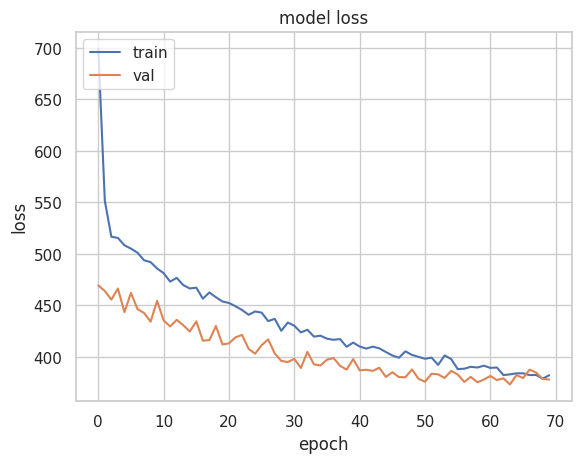

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Посчитаем важность признаков с помощью permutation importance и визуализируем

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━

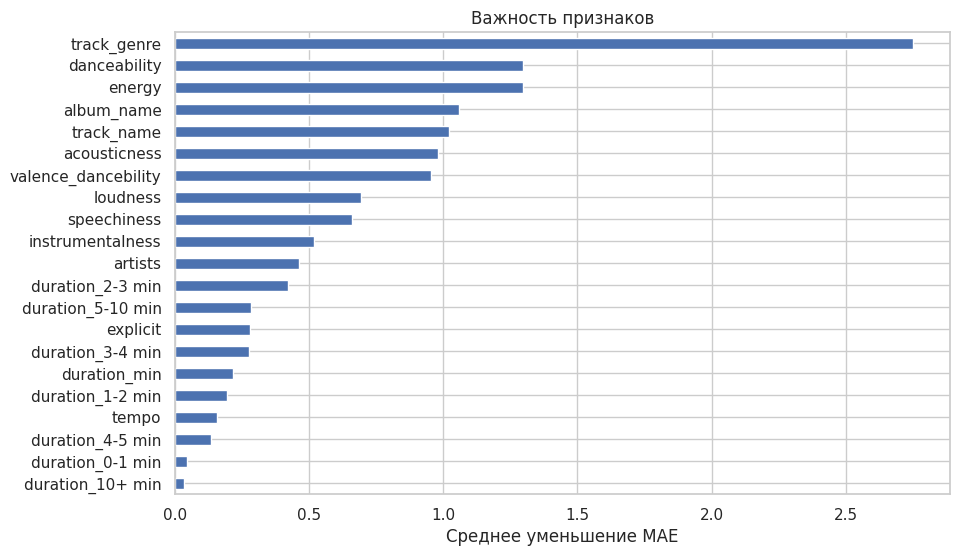

In [ ]:
# Важность признаков с помощью permutation importance
result = permutation_importance(model2, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

Одни из самых важных признаков - жанр трека энергичность и танцевальность.


### Кросс валидация

In [ ]:
model_wrapper2 = KerasRegressor(model=create_model2, epochs=100, batch_size=32, verbose=0)

In [ ]:
cross_val_model2 = calculate_cross_validate(model_wrapper2)
print_cross_validate(cross_val_model2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Средний MSE: 365.53
Лучший MSE: 355.54

Средний R^2: 0.26
Лучший R^2: 0.27


## Модель 3 Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
def create_linear_regression():
  linear_regression = LinearRegression()

  return linear_regression

linear_regression = create_linear_regression()
linear_regression.fit(X_train, y_train)

LinearRegression()

### Результаты


In [ ]:
# Прогнозирование на тестовой выборке
y_pred = linear_regression.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')
print(f'MAPE: {mape:.2f}%')

MAE: 18.19
MSE: 468.75
RMSE: 21.65
R2: 0.06
MAPE: 19681519562520260.00%


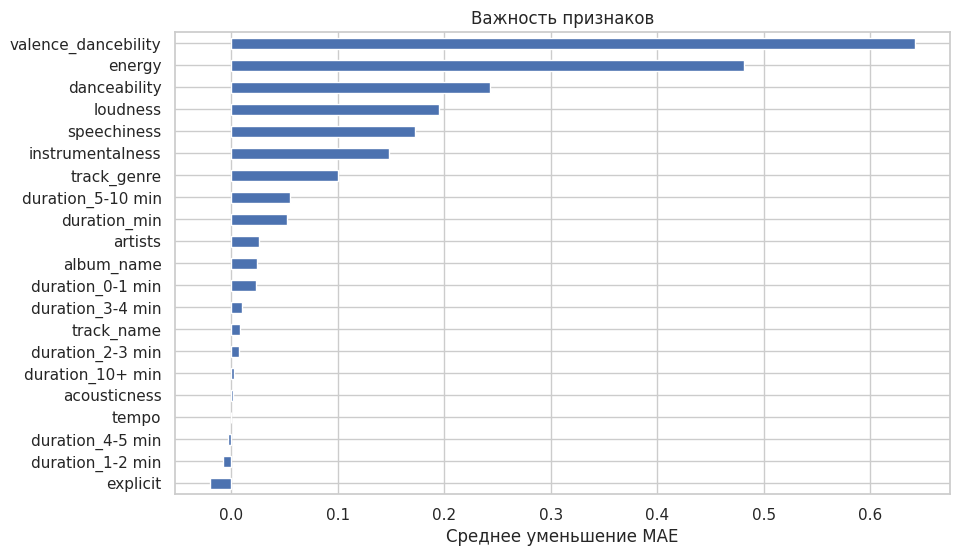

In [ ]:
# Важность признаков с помощью permutation importance
result = permutation_importance(linear_regression, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

Самыми важными признаками являются: настроение-танцевальность, танцевальность, инструментальность

### Кросс Валидация

In [ ]:
cross_validate_linear = calculate_cross_validate(create_linear_regression())
print_cross_validate(cross_validate_linear)

Средний MSE: 467.96
Лучший MSE: 459.45

Средний R^2: 0.06
Лучший R^2: 0.07


## Модель 4 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
def create_random_forest():
  random_forest = RandomForestRegressor(
      random_state=42,
      max_depth=14,
      min_samples_leaf=1,
      min_samples_split=2,
      n_estimators=15
  )

  return random_forest

random_forest = create_random_forest()
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, n_estimators=15, random_state=42)

### Результаты

In [ ]:
# Прогнозирование на тестовой выборке
y_pred = random_forest.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')
print(f'MAPE: {mape:.2f}%')

MAE: 11.84
MSE: 276.79
RMSE: 16.64
R2: 0.45
MAPE: 10516265099229396.00%


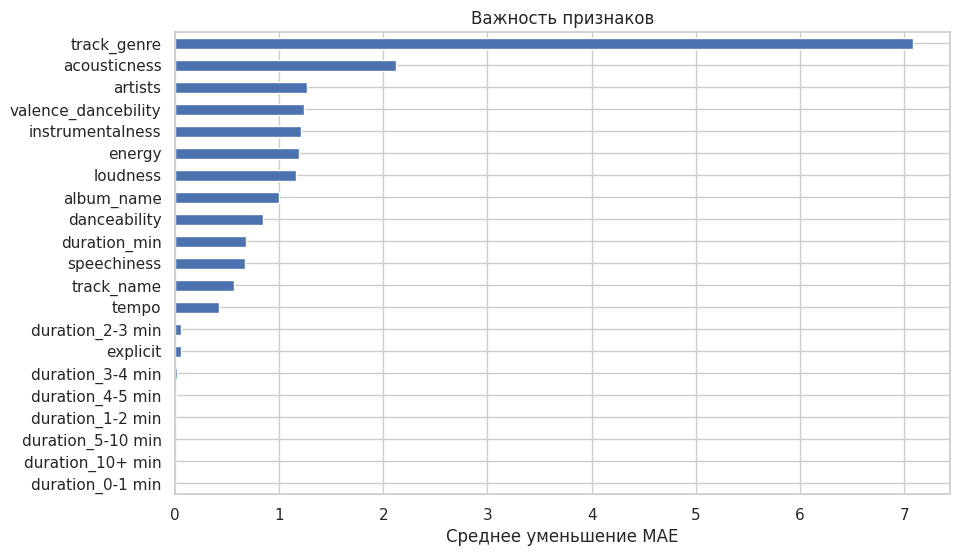

In [ ]:
result = permutation_importance(random_forest, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

Одними из самых важных признаков являются: жанр трека, название альбома и инструментальность трека

### Кросс валидация

In [ ]:
cross_val_random_forest = calculate_cross_validate(create_random_forest())
print_cross_validate(cross_val_random_forest)

Средний MSE: 290.26
Лучший MSE: 279.37

Средний R^2: 0.41
Лучший R^2: 0.43


## Модель 5

In [208]:
from xgboost import XGBRegressor
def create_xgb():
  xgb = XGBRegressor(
      random_state=42,
      colsample_bytree=1.0,
      learning_rate=0.2,
      max_depth=7,
      n_estimators=300,
      subsample=1.0
  )
  return xgb

xgb = create_xgb()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### Результаты

In [209]:
# Прогнозирование на тестовой выборке
y_pred = xgb.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')
print(f'MAPE: {mape:.2f}%')

MAE: 10.25
MSE: 211.92
RMSE: 14.56
R2: 0.58
MAPE: 7313803680605440.00%


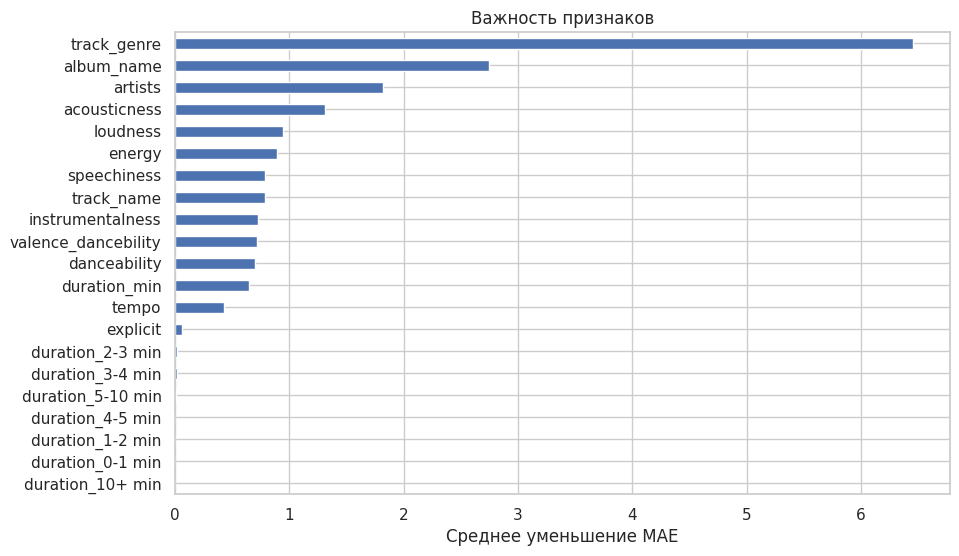

In [210]:
result = permutation_importance(xgb, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

Самыми важными признаками являются: жанр трека, название альбома, артист

### Кросс валидация

In [211]:
cross_val_xgb = calculate_cross_validate(create_xgb())
print_cross_validate(cross_val_xgb)

Средний MSE: 234.89
Лучший MSE: 225.59

Средний R^2: 0.53
Лучший R^2: 0.54


# Сравнение моделей

In [212]:
print('model1')
print('='*20)
print_cross_validate(cross_val_model1)
print('='*20)
print()

print('model2')
print('='*20)
print_cross_validate(cross_val_model2)
print('='*20)
print()

print('model3Линейная')
print('='*20)
print_cross_validate(cross_validate_linear)
print('='*20)
print()

print('model4Random Forest')
print('='*20)
print_cross_validate(cross_val_random_forest)
print('='*20)
print()

print('model25Градиентный бустинг')
print('='*20)
print_cross_validate(cross_val_xgb)

model1
Средний MSE: 387.18
Лучший MSE: 374.42

Средний R^2: 0.22
Лучший R^2: 0.24

model2
Средний MSE: 365.53
Лучший MSE: 355.54

Средний R^2: 0.26
Лучший R^2: 0.27

model3Линейная
Средний MSE: 467.96
Лучший MSE: 459.45

Средний R^2: 0.06
Лучший R^2: 0.07

model4Random Forest
Средний MSE: 290.26
Лучший MSE: 279.37

Средний R^2: 0.41
Лучший R^2: 0.43

model25Градиентный бустинг
Средний MSE: 234.89
Лучший MSE: 225.59

Средний R^2: 0.53
Лучший R^2: 0.54
